# **Semantic-based Unsupervised Framing Analysis (SUFA)**

### DOWNLOAD language model (large & small)

In [ ]:
# Installing spaCy is needed for downlaoding the following language models
!pip install spacy

In [ ]:
import spacy
print(spacy.__version__)

3.6.1


In [ ]:
# Download large English model
!python -m spacy download en_core_web_lg

2023-09-15 15:25:49.111966: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
# Download small English model
# !python -m spacy download en_core_web_sm

In [ ]:
# # This code also does the same task: Downlaod the large languge model
# # I can use EITHER of these two: above one OR this one

# !pip install spacy # Installing spaCy is needed for downlaoding the following language models
# !pip install en_core_web_lg

# import spacy.cli
# spacy.cli.download("en_core_web_lg")

# !python -m spacy download en

## LOAD the spaCylanguage model and NeuralCoref
+ Load the SpaCy language model (one of SpaCy English models)

### 2) Load a model for **Dependency Parsing**

In [ ]:
# Load the spacy model (for Normal/Dependency parsing)

# large trained-data moodel
nlp_lg_dep = spacy.load('en_core_web_lg')

In [ ]:
# # small trained-data moodel
# nlp_sm_dep = spacy.load('en_core_web_sm')

## **Sample Data for Analysis** (without Coreference Resolution)

In [ ]:
# text = "Angry Texas Parents Criticize Police Response to Shooting. Local residents voiced anger Thursday about the time it took to end the mass shooting at an elementary school here, as police laid out a fresh timeline that showed the gunman entered the building unobstructed after lingering outside for 12 minutes firing shots."
text = "A gunman killed 14 students in Texas. The suspect was also killed by police. Police said that he was armed with a long rifle and came to the Texas school."


#### Dependency parsing of texts

In [ ]:
# Retrieve the spaCy Doc (composed of Tokens)
docco = nlp_lg_dep(text)
print(docco)
print(docco[:5])

A gunman killed 14 students in Texas. The suspect was also killed by police. Police said that he was armed with a long rifle and came to the Texas school.
A gunman killed 14 students


In [ ]:
# Loop over items in the Doc object, using the variable 'token' to refer to items in the list
for token in docco:
    # Print each token
    print(token)

NameError: ignored

In [ ]:
print ("{:<8} | {:<15} | {:<8} | {:<8} | {:<15} | {:<20}".format('Token_i', 'Token', 'Relation', 'Head_i', 'Head', 'Children'))
print ("-" * 70)

for token in docco:

#   # Print the token, dependency nature, head and all dependents of the token
    print ("{:<8} | {:<15} | {:<8} | {:<8} | {:<15} | {:<20}"
         .format(int(token.i), str(token.text), str(token.dep_), int(token.head.i), str(token.head.text), str([child for child in token.children])))

Token_i  | Token           | Relation | Head_i   | Head            | Children            
----------------------------------------------------------------------
0        | A               | det      | 1        | gunman          | []                  
1        | gunman          | nsubj    | 2        | killed          | [A]                 
2        | killed          | ROOT     | 2        | killed          | [gunman, students, .]
3        | 14              | nummod   | 4        | students        | []                  
4        | students        | dobj     | 2        | killed          | [14, in]            
5        | in              | prep     | 4        | students        | [Texas]             
6        | Texas           | pobj     | 5        | in              | []                  
7        | .               | punct    | 2        | killed          | []                  
8        | The             | det      | 9        | suspect         | []                  
9        | suspect         |

## **Data Analysis (of multiples files from directories)**
+ directory of files:


In [ ]:
import os
import glob
import pandas as pd

## Load doc_ids, doc_list, doc_sources saved in PICKLE

In [ ]:
# LOADF the output: doc_ids, doc_list, doc_sources in PICKLE
import pickle

# Define the full file path to the pickle file
pickle_file_path = '/content/drive/document_data.pkl'

# Load the data from the pickle file
with open(pickle_file_path, 'rb') as f:
    loaded_data = pickle.load(f)

# Unpack the loaded data into separate lists
loaded_doc_ids, loaded_doc_list, loaded_doc_sources = loaded_data

# Now you can use the loaded lists as needed


In [ ]:
print(len(loaded_doc_ids))
print(loaded_doc_ids[0])
print(loaded_doc_ids[1])

1371
NYT_01
NYT_02


In [ ]:
print(len(loaded_doc_list))
print(loaded_doc_list[0])
# print(loaded_doc_list[1])

1371
https://www.nytimes.com/live/2022/05/24/us/shooting-robb-elementary-uvalde

May 24, 2022

Uvalde Elementary School Shooting.

Shooting at Elementary School Devastates Community in South Texas
It was the deadliest school shooting since the 2012 massacre in Newtown, Conn.

Lowering the state flag to half staff in Uvalde, Texas, on Tuesday.Credit...Christopher Lee for The New York Times





In [ ]:
print(len(loaded_doc_sources))
print(loaded_doc_sources[0])
print(loaded_doc_sources[1])

1371
D:/MyDrive/Data/18. Uvalde_large/NYT/viaGoogle_manual/data_nyt_262
D:/MyDrive/Data/18. Uvalde_large/NYT/viaGoogle_manual/data_nyt_262


In [ ]:
# loaded_doc_ids

In [ ]:
# document_lengths = [len(doc) for doc in loaded_doc_list]
# list(set(document_lengths))

##### Check if there is duplicates in the doc_id

In [ ]:
# Convert the list to a set to remove duplicates
unique_set = set(loaded_doc_ids)

# Check if there are duplicates
has_duplicates = len(loaded_doc_ids) != len(unique_set)
print(has_duplicates)

True


In [ ]:
duplicate_values = []

# Create a set to track unique values
unique_values = set()

# Iterate through the list
for doc_id in loaded_doc_ids:
    # If the value is already in the set, it's a duplicate
    if doc_id in unique_values:
        duplicate_values.append(doc_id)
    else:
        # Otherwise, add it to the set
        unique_values.add(doc_id)
duplicate_values

['NYT_171', 'NYT_172', 'NYT_25', 'NYT_30', 'WPO_172', 'WPO_56']

In [ ]:
from collections import Counter

# Count the occurrences of each value in loaded_doc_ids
doc_id_counts = Counter(loaded_doc_ids)

# Filter for values that have a count greater than 1 (i.e., duplicates)
duplicates = {value: count for value, count in doc_id_counts.items() if count > 1}
duplicates

{'NYT_171': 2,
 'NYT_172': 2,
 'NYT_25': 2,
 'NYT_30': 2,
 'WPO_172': 2,
 'WPO_56': 2}

##### Rename duplicates in the doc_id while keeping one of them

In [ ]:
# Assuming you have loaded_doc_ids as a list of document IDs

# Create a dictionary to track the count of each value
value_count = {}

# Create a list to store the modified values
modified_doc_ids = []

# Iterate through the list
for doc_id in loaded_doc_ids:
    # Check if the value has been encountered before
    if doc_id in value_count:
        # If it's a duplicate, increment the count
        value_count[doc_id] += 1
        # Rename the duplicate with an appended count
        modified_doc_id = f"{doc_id}_{value_count[doc_id]}"
        modified_doc_ids.append(modified_doc_id)
    else:
        # If it's the first occurrence, add it as is
        modified_doc_ids.append(doc_id)
        # Initialize the count for this value
        value_count[doc_id] = 1

# Now, modified_doc_ids contains the list with duplicates renamed


In [ ]:
len(modified_doc_ids)

1371

In [ ]:
unique_lengths = set(len(doc_id) for doc_id in modified_doc_ids)

# Calculate the number of unique lengths
len(unique_lengths)

13

## Load doc_coref_resolved saved in Pickle

In [ ]:
# LOAD doc_coref_resolved
import pickle

# Specify the path to the pickle file
pickle_file_path = "/content/drive/MyDrive/doc_coref_resolved.pkl"

# Load the doc_coref_resolved list from the pickle file
with open(pickle_file_path, 'rb') as f:
    loaded_doc_coref_resolved = pickle.load(f)

# Now, you can work with the loaded doc_coref_resolved list
print(len(loaded_doc_coref_resolved))
print(loaded_doc_coref_resolved[0])

1371
https://www.nytimes.com/live/2022/05/24/us/shooting-robb-elementary-uvalde

May 24, 2022

Uvalde Elementary School Shooting.

Shooting at Elementary School Devastates Community in South Texas
It was the deadliest school shooting since the 2012 massacre in Newtown, Conn.

Lowering the state flag to half staff in Uvalde, Texas, on Tuesday.Credit...Christopher Lee for The New York Times





#### Data Cleaning

In [ ]:
# # Remove links from news reports
# import re

# # Function to remove links starting with "https" or "http"
# def remove_links(text):
#     # Define a regular expression pattern to match URLs
#     url_pattern = r"https?://\S+"

#     # Replace URLs with an empty string
#     cleaned_text = re.sub(url_pattern, "", text)

#     return cleaned_text

# # Process each news report in the doc_coref_resolved list
# doc_coref_resolved_noliks = [remove_links(report) for report in loaded_doc_coref_resolved]


In [ ]:
# len(doc_coref_resolved_noliks)

In [ ]:
# doc_coref_resolved_noliks[1]

In [ ]:
# Define a function to remove unwanted characters/texts/url from a text
import re
def remove_unwanted_characters(text):

    # Replace double newline characters with a single newline and put period if there is no period
    pattern = r'([^.])\n\n'
    text = re.sub(pattern, r'\1.\n', text)

    # Replace single newline characters with a space
    text = text.replace("\n", " ")

    # Replace tab characters with a space
    text = text.replace("\t", " ")

    # Replace "x0c" with a space
    text = text.replace("\x0c", " ")

    # Repalce any double spaces with signle space
    text = re.sub(r' +', ' ', text)

    # Remove URLs using re.sub()
    url_pattern = r'https?://\S+|www\.\S+'
    text = re.sub(url_pattern, '', text)

    return text

# Process each document in the list
doc_coref_resolved_clean = [remove_unwanted_characters(document) for document in loaded_doc_coref_resolved]

In [ ]:
len(doc_coref_resolved_clean)

1371

In [ ]:
doc_coref_resolved_clean[3]

" May 27, 2022. The Gunman in Uvalde Left Multiple Hints Before The Gunman in Uvalde Left Multiple Hints Attack Began. Particularly online, the teenager who killed 19 students and two teachers at an elementary school provided dark warnings about the carnage to come. UVALDE, Texas — It did not go without notice when an 18-year-old who frequently sparred with classmates before dropping out of high school posted a picture of two long, black rifles on his Instagram story. The image was startling enough that a freshman at Uvalde High School sent The image to a freshman at Uvalde High School older cousin on Saturday morning and asked who would have let the former student obtain the weapons. “the former student finna shoot something up,” replied the older cousin, Jeremiah Munoz, who had graduated from Uvalde High School and knew the former student. a freshman at Uvalde High School noted that the week ahead was the last of the school year and said, in words that would become chillingly prescie

In [ ]:
doc_coref_resolved_clean5 = doc_coref_resolved_clean[0:5]

In [ ]:
len(doc_coref_resolved_clean5)

5

In [ ]:
test_text = ["A 18-year told gunman killed 14 students and two teachers, police says."]

### **Word Embedding**

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.7 MB/s eta 0:00:00


In [ ]:
import spacy
from transformers import BertTokenizer, BertModel, BertConfig
import torch

In [ ]:
## TRY again for contextual word embedding

# import spacy
# from transformers import BertTokenizer, BertModel
# import torch

# # Load the BERT tokenizer and model
# tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
# bert_model = BertModel.from_pretrained("bert-base-uncased")

# Print header for the output
print("{:<5} | {:<5} | {:<15} | {:<5} | {:<10} | {:<5} | {:<8} | {:<5} | {:<10} | {:<5} | {:<20} | {:<10} | {}".format(
    'c_in', 'd_in', 'doc_id', 'T_i_d', 'Token', 't_POS', 'Relation', 'Head_i', 'Head', 'h_POS', 'Children', 'Sentence', 'Embedding'))
print("-" * 130)

output_data = []
index_num_doc = 0
index_num_corpus = 0

for doc_id, document in zip(loaded_doc_ids, doc_coref_resolved_noliks1):
    index_num_doc += 1
    parsed_doc = nlp_lg_dep(document)

    for token in parsed_doc:
        index_num_corpus += 1

        # Use BERT to obtain contextualized embeddings
        input_ids = tokenizer.encode(token.text, add_special_tokens=True)
        input_ids = torch.tensor(input_ids).unsqueeze(0)  # Convert to Long
        with torch.no_grad():
            outputs = bert_model(input_ids)
            embeddings = outputs.last_hidden_state  # BERT embeddings for the token
        embedding_values = embeddings.flatten().tolist()

        # # Print the token, all its heads and children, and their dependency relations
        # print("{:<5} | {:<5} | {:<15} | {:<5} | {:<10} | {:<5} | {:<8} | {:<5} | {:<10} | {:<5} | {:<20} | {:<10} | {}".format(
        #     index_num_corpus, index_num_doc, doc_id, int(token.i), str(token.text), str(token.pos_), str(token.dep_),
        #     int(token.head.i), str(token.head.text), str(token.head.pos_), str([child for child in token.children]), token.sent.text,
        #     embedding_values))

        output_data.append([index_num_corpus, index_num_doc, doc_id, int(token.i), str(token.text), str(token.pos_), str(token.dep_),
                            int(token.head.i), str(token.head.text), str(token.head.pos_), str([child for child in token.children]),
                            token.sent.text, embedding_values])


c_in  | d_in  | doc_id          | T_i_d | Token      | t_POS | Relation | Head_i | Head       | h_POS | Children             | Sentence   | Embedding
----------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# With LIMITED contextual embeddings

# import spacy
# from transformers import BertTokenizer, BertModel, BertConfig
# import torch

# Load the BERT tokenizer and model with a custom attention window
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
config = BertConfig.from_pretrained("bert-base-uncased", attention_window=2)
bert_model = BertModel.from_pretrained("bert-base-uncased", config=config)

# Print header for the output
print("{:<5} | {:<5} | {:<15} | {:<5} | {:<10} | {:<5} | {:<8} | {:<5} | {:<10} | {:<5} | {:<20} | {:<10} | {}".format(
    'c_in', 'd_in', 'doc_id', 'T_i_d', 'Token', 't_POS', 'Relation', 'Head_i', 'Head', 'h_POS', 'Children', 'Sentence', 'Embedding'))
print("-" * 150)

output_data = []
index_num_doc = 0
index_num_corpus = 0

for doc_id, document in zip(loaded_doc_ids, test_text):
    index_num_doc += 1
    parsed_doc = nlp_lg_dep(document)

    for token in parsed_doc:
        index_num_corpus += 1

        # Use BERT to obtain contextualized embeddings
        input_ids = tokenizer.encode(token.text, add_special_tokens=True)
        input_ids = torch.tensor(input_ids).unsqueeze(0)  # Convert to Long
        with torch.no_grad():
            outputs = bert_model(input_ids)
            embeddings = outputs.last_hidden_state  # BERT embeddings for the token

      # Print the token, all its heads and children, and their dependency relations
        # print("{:<5} | {:<5} | {:<15} | {:<5} | {:<10} | {:<5} | {:<8} | {:<5} | {:<10} | {:<5} | {:<20} | {:<10} | {}".format(
        #     index_num_corpus, index_num_doc, doc_id, int(token.i), str(token.text), str(token.pos_), str(token.dep_),
        #     int(token.head.i), str(token.head.text), str(token.head.pos_), str([child for child in token.children]), token.sent.text,
        #     embedding_values))
        embedding_values = embeddings.flatten().tolist()
        output_data.append([index_num_corpus, index_num_doc, doc_id, int(token.i), str(token.text), str(token.pos_), str(token.dep_),
                            int(token.head.i), str(token.head.text), str(token.head.pos_), str([child for child in token.children]),
                            token.sent.text, embedding_values])


c_in  | d_in  | doc_id          | T_i_d | Token      | t_POS | Relation | Head_i | Head       | h_POS | Children             | Sentence   | Embedding
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
len(output_data)

16

In [ ]:
# SAVE as Pickle file

import pickle

# Define the filename
filename = "output_data.pkl"

# Save the list with pickle
with open(filename, "wb") as file:
    pickle.dump(output_data, file)


In [ ]:
# SAVE output_data in picke (with )
import pickle

# Define the filename for the pickle file
filename = "output_data.pkl"

# Define the header as a list
header = [
    'c_in', 'd_in', 'doc_id', 'T_i_d', 'Token', 't_POS', 'Relation', 'Head_i', 'Head', 'h_POS', 'Children', 'Sentence', 'Embedding'
]

# Append the header as the first element in the output_data list
output_data.insert(0, header)

# Save the output_data list (including the header) as a pickle file
with open(filename, "wb") as file:
    pickle.dump(output_data, file)

print(f"Saved output data (including header) to {filename} as a pickle file.")


Saved output data (including header) to output_data.pkl as a pickle file.


In [ ]:
# LOAD as Pickle file
import pickle

# Define the filename
filename = "output_data.pkl"

# Load the list from the pickle file
with open(filename, "rb") as file:
    loaded_data = pickle.load(file)


In [ ]:
# !pip install pandas
import pandas as pd

# Create a DataFrame from 'output_data'
df = pd.DataFrame(loaded_data)

In [ ]:
# Display the first few rows of the DataFrame
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,c_in,d_in,doc_id,T_i_d,Token,t_POS,Relation,Head_i,Head,h_POS,Children,Sentence,Embedding
1,1,1,NYT_01,0,A,DET,det,5,gunman,NOUN,[],A 18-year told gunman killed 14 students and t...,"[-0.44223296642303467, -0.05258849635720253, -..."
2,2,1,NYT_01,1,18,NUM,nummod,3,year,NOUN,[],A 18-year told gunman killed 14 students and t...,"[-0.8720483779907227, 0.20121508836746216, -0...."
3,3,1,NYT_01,2,-,PUNCT,punct,3,year,NOUN,[],A 18-year told gunman killed 14 students and t...,"[-0.2632640302181244, -0.11070103198289871, -0..."
4,4,1,NYT_01,3,year,NOUN,nmod,5,gunman,NOUN,"[18, -]",A 18-year told gunman killed 14 students and t...,"[-0.26762861013412476, 0.26768243312835693, 0...."


In [ ]:
len(df)

1113

### **SAVE the dependepcy parsing output as csv file for further analysis with Pandas**

In [ ]:
# Print header for the output
print("{:<5} | {:<5} | {:<15} | {:<5} | {:<10} | {:<5} | {:<8} | {:<5} | {:<10} | {:<5} | {:<20} | {:<10}".format(
    'c_in', 'd_in', 'doc_id', 'T_i_d', 'Token', 't_POS', 'Relation', 'Head_i', 'Head', 'h_POS', 'Children', 'Sentence'))
print("-" * 130)

output_data2 = []
index_num_doc = 0
index_num_corpus = 0

# for doc_id, document in zip(doc_ids, doc_coref_resolved_clean):
for doc_id, document in zip(modified_doc_ids, doc_coref_resolved_clean):
    index_num_doc += 1
    parsed_doc = nlp_lg_dep(document)

    for token in parsed_doc:
        index_num_corpus += 1

        # Print the token, all its heads and children, and their dependency relations
        # print("{:<5} | {:<5} | {:<15} | {:<5} | {:<10} | {:<5} | {:<8} | {:<5} | {:<10} | {:<5} | {:<20} | {:<10}".format(
        #     index_num_corpus, index_num_doc, doc_id, int(token.i), str(token.text), str(token.pos_), str(token.dep_),
        #     int(token.head.i), str(token.head.text), str(token.head.pos_), str([child for child in token.children]), token.sent.text))

        output_data2.append([index_num_corpus, index_num_doc, doc_id, int(token.i), str(token.text), str(token.pos_), str(token.dep_),
                            int(token.head.i), str(token.head.text), str(token.head.pos_), str([child for child in token.children]),
                            token.sent.text])


In [ ]:
# # SAVE the output_data as csv

# import pandas as pd

# # Create a DataFrame from 'output_data'
# df = pd.DataFrame(output_data2, columns=[
#     'cor_in', 'doc_in', 'doc_id', 'token_id',
#     'token', 'token_pos', 'relation', 'head_id',
#     'head', 'head_pos', 'token_children', 'sentence'
# ])

# # Define the CSV file path where you want to save the data
# # csv_file_path = '/content/drive/dep_parsing_outputCSV.csv'  # Update the path as needed
# csv_file_path = '/content/drive/dep_parsing_outputCSV_renameddoc_ids.csv'  # Update the path as needed

# # Save the DataFrame to a CSV file with an escape character
# df.to_csv(csv_file_path, index=False, escapechar='\\')

# # Optionally, you can display the first few rows of the DataFrame
# print(df.head())

In [ ]:
len(df)

1621542

## **LOAD the dependepcy parsing CSV output & Analysis**

In [ ]:
import pandas as pd
# read the CSV output file
# df = pd.read_csv('/content/drive/dep_parsing_outputCSV.csv')
df = pd.read_csv('/content/drive/dep_parsing_outputCSV_renameddoc_ids.csv')
print(df.index)
df.head()

RangeIndex(start=0, stop=1621542, step=1)


,cor_in,doc_in,doc_id,token_id,token,token_pos,relation,head_id,head,head_pos,token_children,sentence
0,1,1,NYT_01,0,,SPACE,dep,1,May,PROPN,[],"May 24, 2022."
1,2,1,NYT_01,1,May,PROPN,ROOT,1,May,PROPN,"[ , 24, ,, 2022, .]","May 24, 2022."
2,3,1,NYT_01,2,24,NUM,nummod,1,May,PROPN,[],"May 24, 2022."
3,4,1,NYT_01,3,",",PUNCT,punct,1,May,PROPN,[],"May 24, 2022."
4,5,1,NYT_01,4,2022,NUM,npadvmod,1,May,PROPN,[],"May 24, 2022."


In [ ]:
len(df.token)

1621542

In [ ]:
len(df['doc_id'].unique())

1371

In [ ]:
# Define a function to map media names
def map_media(doc_id):
    if 'NYT' in doc_id:
        return 'NYT'
    elif 'WPO' in doc_id:
        return 'WPO'
    elif 'UTO' in doc_id:
        return 'UTO'
    elif 'WSJ' in doc_id:
        return 'WSJ'
    elif 'NYP' in doc_id:
        return 'NYP'
    elif 'DMN' in doc_id:
        return 'DMN'
    elif 'THL' in doc_id:
        return 'THL'
    elif 'INS' in doc_id:
        return 'INS'
    elif 'OGL' in doc_id:
        return 'OGL'
    elif 'SSN' in doc_id:
        return 'SSN'
    elif 'DMR' in doc_id:
        return 'DMR'
    else:
        return 'Unknown'

# Create a new column 'media' using the map_media function
df['media'] = df['doc_id'].apply(map_media)

In [ ]:
df.tail(5)

,cor_in,doc_in,doc_id,token_id,token,token_pos,relation,head_id,head,head_pos,token_children,sentence,media
1621537,1621538,1371,DMR_43_9,605,gunman,NOUN,dobj,598,shot,VERB,"[the, old, dead]",Another caller reported that eight or nine stu...,DMR
1621538,1621539,1371,DMR_43_9,606,dead,ADJ,amod,605,gunman,NOUN,[],Another caller reported that eight or nine stu...,DMR
1621539,1621540,1371,DMR_43_9,607,at,ADP,prep,598,shot,VERB,[12:50],Another caller reported that eight or nine stu...,DMR
1621540,1621541,1371,DMR_43_9,608,12:50,NUM,pobj,607,at,ADP,[],Another caller reported that eight or nine stu...,DMR
1621541,1621542,1371,DMR_43_9,609,p.m.,ADV,advmod,598,shot,VERB,[],Another caller reported that eight or nine stu...,DMR


In [ ]:
df.groupby('media')['doc_id'].nunique()

media
DMN    155
DMR     28
INS     39
NYP    255
NYT    227
OGL     18
SSN     19
THL    227
UTO    128
WPO    228
WSJ     47
Name: doc_id, dtype: int64

In [ ]:
# count frequency for each media org
word_counts = df['media'].value_counts()

# print the results
print(word_counts)

WPO    380811
NYT    372238
NYP    197252
THL    187933
DMN    165738
UTO    140873
WSJ     58043
INS     40212
DMR     31050
SSN     26755
OGL     20637
Name: media, dtype: int64


In [ ]:
# Filter rows where the 'media' column has 'Unknown' value
unknown_media_rows = df[df['media'] == 'Unknown']

# Print the rows with 'Unknown' media
print(unknown_media_rows)

# SO, THERE IS NOT ROWS BEYOND THE SELECTED NEWS MEDIA OUTLETS

Empty DataFrame
Columns: [cor_in, doc_in, doc_id, token_id, token, token_pos, relation, head_id, head, head_pos, token_children, sentence, media]
Index: []


In [ ]:
# filter df by shooter/victim/event KEYWORDS in head (or token)
shooter_keywords = ["gunman", "gunmen", "man", "Salvador", "Ramos", "shooter", "shooters", "suspect"]
victim_keywords = ["adult", "adults", "child", "children", "kids", "schoolchildren", "student", "students", "teacher", "teachers", "victim", "victims"]
event_keywords = ["shooting", "shootings", "attack", "massacre", "event", "tragedy", "terrorism", "slaughter", "crime", "slayings", "murder", "aftermath"]

# SELECT PARTICULAR ENTITY'S KEYWORDS

df_keywords = df[(df['head'].isin(shooter_keywords))]
# df_keywords = df[(df['Token'].isin(shooter_keywords)) | (df['Head'].isin(shooter_keywords))]

# df_keywords = df[(df['head'].isin(victim_keywords))]
# df_keywords = df[(df['Token'].isin(victim_keywords)) | (df['Head'].isin(victim_keywords))]

# df_keywords = df[(df['head'].isin(event_keywords))]
# df_keywords = df[(df['Head'].isin(event_keywords)) | (df['Token'].isin(event_keywords))]

df_keywords.head(2)


,cor_in,doc_in,doc_id,token_id,token,token_pos,relation,head_id,head,head_pos,token_children,sentence,media
110,111,2,NYT_02,51,UVALDE,PROPN,nmod,56,gunman,NOUN,"[,, Texas, —]","UVALDE, Texas — A gunman killed at least 19 ch...",NYT
114,115,2,NYT_02,55,A,DET,det,56,gunman,NOUN,[],"UVALDE, Texas — A gunman killed at least 19 ch...",NYT


In [ ]:
# filter df_keywords by the three groups of news media outlets [just to check/see how the documents/tokens are distributed among all outlet gorups]

df_keywords_left = df_keywords[df_keywords['doc_id'].str.contains('NYT|WPO|UTO')]
df_keywords_right = df_keywords[df_keywords['doc_id'].str.contains('WSJ|NYP|DMN')]
df_keywords_least = df_keywords[df_keywords['doc_id'].str.contains('THL|INS|OGL|SSN|DMR')]

# print(df_keywords_left.head(2))
# print(df_keywords_right.head(2))
# print(df_keywords_least.head(2))

In [ ]:
###########################
# I AM NOR RUNNING THIS CELL AS I HAVE ALREDY DETERMINED THE RELATIONS
###########################

# group the DataFrame by Head and Token columns and count the frequency of each token in each group\
# Here, we can check the possible relations we need to include/update

df_grouped = df_keywords.groupby(['head', 'token', 'relation']).size().reset_index(name='count')

# sort the resulting DataFrame by count column in descending order
df_sorted = df_grouped.sort_values(by='count', ascending=False)

# split the resulting DataFrame by Relation column
df_relation_groups = df_sorted.groupby('relation')

# display the resulting DataFrames for each Relation group
for relation, group_df in df_relation_groups:
    sheet_name = f"{relation}_group"
    print(f"Relation: {relation}")
    print(group_df)

In [ ]:
# Now filter the df by certain RELATIONS (shooter/victim/event) between head and token

shooter_rels = ['acl', "amod", 'appos', "compound", "relc", 'nsubj', 'dobj', 'nsubjpass']
victim_rels = ['acl', 'compound', 'nummod', 'relcl', 'amod', 'dobj', 'nsubj', 'nsubjpass', 'poss']
event_rels = ['amod', 'advmod', 'compound', 'nummod', 'relcl']

# SELECT PARTICULAR ENTITY'S RELATIONS

df_keywords_rels = df_keywords[(df_keywords['relation'].isin(shooter_rels)) & ~(df['token'].isin(['Salvador', 'Rolando', 'Ramos', 'Mr.']))]
# df_keywords_rels = df_keywords[(df_keywords['relation'].isin(victim_rels))]
# df_keywords_rels = df_keywords[(df_keywords['relation'].isin(event_rels))]

# df_keywords_left_rels = df_keywords_left[(df_keywords_left['relation'].isin(event_rels))]
# df_keywords_right_rels = df_keywords_right[(df_keywords_right['relation'].isin(event_rels))]
# df_keywords_least_rels = df_keywords_least[(df_keywords_left['relation'].isin(event_rels))]

# df_keywords_rels = df_keywords[(df_keywords['relation'].isin([shooter_rels, victim_rels, event_rels]))]
# df_keywords_rels = df_keywords[(df_keywords['relation'].isin(["amod", "advmod"]))]
print(len(df_keywords_rels))
df_keywords_rels.head(2)


3312


<ipython-input-13-1a0e09e7a0e0>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_keywords_rels = df_keywords[(df_keywords['relation'].isin(shooter_rels)) & ~(df['token'].isin(['Salvador', 'Rolando', 'Ramos', 'Mr.']))]


,cor_in,doc_in,doc_id,token_id,token,token_pos,relation,head_id,head,head_pos,token_children,sentence,media
116,117,2,NYT_02,57,killed,VERB,acl,56,gunman,NOUN,"[children, on, in]","UVALDE, Texas — A gunman killed at least 19 ch...",NYT
229,230,2,NYT_02,170,old,ADJ,amod,171,man,NOUN,"[year, -]","The gunman, whom the authorities identified as...",NYT


In [ ]:
print(df_keywords_left.head(5))
print(df_keywords_right.head(5))
print(df_keywords_least.head(5))

     cor_in  doc_in  doc_id  token_id   token token_pos relation  head_id  \
110     111       2  NYT_02        51  UVALDE     PROPN     nmod       56   
114     115       2  NYT_02        55       A       DET      det       56   
116     117       2  NYT_02        57  killed      VERB      acl       56   
216     217       2  NYT_02       157     The       DET      det      158   
218     219       2  NYT_02       159       ,     PUNCT    punct      158   

       head head_pos      token_children  \
110  gunman     NOUN       [,, Texas, —]   
114  gunman     NOUN                  []   
116  gunman     NOUN  [children, on, in]   
216  gunman     NOUN                  []   
218  gunman     NOUN                  []   

                                              sentence media  
110  UVALDE, Texas — A gunman killed at least 19 ch...   NYT  
114  UVALDE, Texas — A gunman killed at least 19 ch...   NYT  
116  UVALDE, Texas — A gunman killed at least 19 ch...   NYT  
216  The gunman, who

#### **RQ1: Do the news media outlets use adjectives, adverbs, and other modifiers while framing the shooter, victims, and the event in the Texas mass shooting? If yes, to what extent do they use these modifying words?**

+ Find the percentage of news reports using any of the three groups (shooter, victim, event) of modifying words together, and each of the groups seperately.

In [ ]:
# Create a new df "filtered_df" of those cells that match (shooter_keywords & shooter_rels) OR (victim_keywords & victim_rels) OR (event_keywords & event_rels)
filtered_df = df[(df["head"].isin(shooter_keywords) & df["relation"].isin(shooter_rels)) & ~(df['token'].isin(['Salvador', 'Rolando', 'Ramos', 'Mr.']))| # Here, "& ~(df['Token'].isin(['Salvador', 'Rolando', 'Ramos', 'Mr.']))]" exclude rows where the value in the 'Token' column is "Salvador" or "Ramos"
                 (df["head"].isin(victim_keywords) & df["relation"].isin(victim_rels)) |
                 (df["head"].isin(event_keywords) & df["relation"].isin(event_rels)) ]
print("Total rows with all keywords & relations:", len(filtered_df))

# Count the number of unique doc_id values in the filtered DataFrame
num_filtered_docs = len(filtered_df["doc_id"].unique())
print("Total news reprots (all media) w matched keywords_rels (all 3 groups):", num_filtered_docs)

# count the total number of unique doc_id values in the original DataFrame
num_total_docs = len(df["doc_id"].unique())
print("Total news reports in the corpus:", num_total_docs)

# calculate the percentage of news reports using the keywords
percent_using_keywords = (num_filtered_docs / num_total_docs) * 100
print("% of news reports using the keywords:", percent_using_keywords)

Total rows with all keywords & relations: 22502
Total news reprots (all media) w matched keywords_rels (all 3 groups): 1347
Total news reports in the corpus: 1371
% of news reports using the keywords: 98.24945295404814


In [ ]:
# for % of news reports with only shooter

filtered_df_shooter = df[(df["head"].isin(shooter_keywords) & df["relation"].isin(shooter_rels) & ~(df['token'].isin(['Salvador', 'Rolando', 'Ramos', 'Mr.'])))]  # Here, "& ~(df['Token'].isin(['Salvador', 'Rolando', 'Ramos', 'Mr.']))]" exclude rows where the value in the 'Token' column is "Salvador" or "Ramos"
print("Total rows with shooter keywords & relations:", len(filtered_df_shooter))

# count the number of unique doc_id values in the filtered DataFrame
num_filtered_docs = len(filtered_df_shooter["doc_id"].unique())
print("Total news reprots (all media) w matched keywords_rels (shooter):", num_filtered_docs)

# count the total number of unique doc_id values in the original DataFrame
# num_total_docs = len(df["doc_id"].unique())
# print(num_total_docs)

# calculate the percentage of news outlets using the keywords
percent_using_keywords = (num_filtered_docs / num_total_docs) * 100
print(percent_using_keywords)

Total rows with shooter keywords & relations: 3312
Total news reprots (all media) w matched keywords_rels (shooter): 806
58.7892049598833


In [ ]:
# for % of news reports with only victim

filtered_df_victim = df[(df["head"].isin(victim_keywords) & df["relation"].isin(victim_rels))]
print("Total rows with victim keywords & relations:", len(filtered_df_victim))

# count the number of unique doc_id values in the filtered DataFrame
num_filtered_docs = len(filtered_df_victim["doc_id"].unique())
print("Total news reprots (all media) w matched keywords_rels (victim):", num_filtered_docs)

# count the total number of unique doc_id values in the original DataFrame
# num_total_docs = len(df["doc_id"].unique())
# print(num_total_docs)

# calculate the percentage of news outlets using the keywords
percent_using_keywords = (num_filtered_docs / num_total_docs) * 100
print(percent_using_keywords)

Total rows with victim keywords & relations: 9736
Total news reprots (all media) w matched keywords_rels (victim): 1203
87.74617067833698


In [ ]:
# for % of news reports with only event

filtered_df_event = df[(df["head"].isin(event_keywords) & df["relation"].isin(event_rels))]
print("Total rows with event keywords & relations:", len(filtered_df_event))

# count the number of unique doc_id values in the filtered DataFrame
num_filtered_docs = len(filtered_df_victim["doc_id"].unique())
print("Total news reprots (all media) w matched keywords_rels (event):", num_filtered_docs)

# count the total number of unique doc_id values in the original DataFrame
# num_total_docs = len(df["doc_id"].unique())
# print(num_total_docs)

# calculate the percentage of news outlets using the keywords
percent_using_keywords = (num_filtered_docs / num_total_docs) * 100
print(percent_using_keywords)

Total rows with event keywords & relations: 9454
Total news reprots (all media) w matched keywords_rels (event): 1203
87.74617067833698


#### **RQ2: What kinds of adjectives, adverbs, and other modifiers do the news media outlets use in framing the shooter/ victims/ event in the Texas mass shooting?**

In [ ]:
!pip install wordcloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# Rels for word cloud
shooter_keywords_wc = ["gunman", "gunmen", "man", "Salvador", "Ramos", "shooter", "shooters", "suspect"]
victim_keywords_wc = ["adult", "adults", "child", "children", "kids", "schoolchildren", "student", "students", "teacher", "teachers", "victim", "victims"]
event_keywords_wc = ["shooting", "shootings", "attack", "massacre", "event", "tragedy", "terrorism", "slaughter", "crime", "slayings", "murder", "aftermath"]


In [ ]:
# df_keywords_shooter = df[(df['Head'].isin(shooter_keywords_wc))] # this code include "Salvador" and "Ramos" as modifier as well in the Token column
df_keywords_shooter = df[(df['head'].isin(shooter_keywords_wc)) & ~(df['token'].isin(['Salvador', 'Rolando', 'Rolando', 'Ramos', 'Mr.']))] # Here, this code exclude rows where the value in the 'Token' column is "Salvador" or "Ramos"

df_keywords_victim = df[(df['head'].isin(victim_keywords_wc))]
df_keywords_event = df[(df['head'].isin(event_keywords_wc))]

In [ ]:
df_keywords_rels_shooter = df_keywords_shooter[(df_keywords_shooter['relation'].isin(shooter_rels))]
df_keywords_rels_victim = df_keywords_victim[(df_keywords_victim['relation'].isin(victim_rels))]
df_keywords_rels_event = df_keywords_event[(df_keywords_event['relation'].isin(event_rels))]

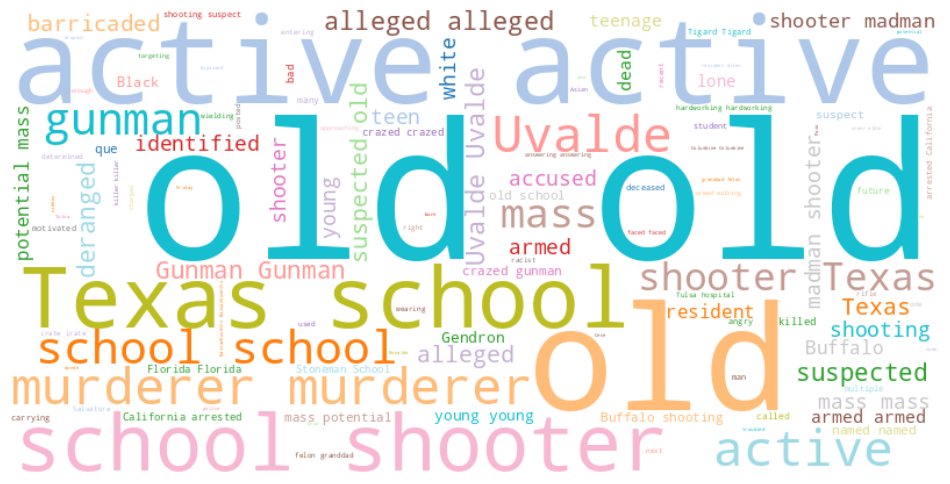

In [ ]:
# for SHOOTER
# combine all the words in the "Token" column into a single string and make word-cloud
text = ' '.join(df_keywords_rels_shooter['token'].values.tolist())
# text = ' '.join(df['Token'] + ' ' + df['Head'])

# create the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab20', max_words=None, stopwords=None).generate(text)
# wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab20').generate(text)
# wordcloud = WordCloud(background_color="white", width=800, height=400).generate(' '.join(df_keywords_rels['Token']))

# generate the word cloud
# wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab20').generate(text)

# plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Save the word cloud as a PNG file
wordcloud.to_file("wordcloud_shooter.jpg")

In [ ]:
save the WordCloud as a PNG file
wordcloud.to_file("wordcloud_event.png")

SyntaxError: ignored

In [ ]:
# SEE only rows where "head" column contains the word "Rolando"

# Fill NaN values in the "head" column with an empty string or any suitable value
df['head'] = df['head'].fillna('')

# Create a boolean mask that checks if "Rolando" is in the "head" column
mask = df['head'].str.contains('Rolando')

# Apply the mask to filter the DataFrame
df_rolando = df[mask]
df_rolando.head(2)

,cor_in,doc_in,doc_id,token_id,token,token_pos,relation,head_id,head,head_pos,token_children,sentence,media
382003,382004,231,WPO_05,1139,Salvador,PROPN,compound,1140,Rolando,PROPN,[],“Salvador Rolando Ramos posted videos on Salva...,WPO
382032,382033,231,WPO_05,1168,Salvador,PROPN,compound,1169,Rolando,PROPN,[],“Salvador Rolando Ramos’d be screaming and tal...,WPO


In [ ]:
# Set the display option to show the full text in DataFrame columns
pd.set_option('display.max_colwidth', None)

# Access the "sentence" column of the filtered DataFrame
sentences_containing_rolando = df_rolando['sentence']
sentences_containing_rolando.head()

382003     “Salvador Rolando Ramos posted videos on Salvador Rolando Ramos Instagram where the cops were there and Salvador Rolando Ramos’d call Salvador Rolando Ramos mom a b---- and say his mom wanted to kick Salvador Rolando Ramos out,”.
382032                                                                                                                                                      “Salvador Rolando Ramos’d be screaming and talking to his mom really aggressively.”.
1060255                                                                              Rolando Reyes said the attack erupted following a dispute between Salvador and Reyes grandmother at the home where the three lived together on Diaz Street.
1216328                                                                                                                                                                     Jose Rolando, 36, said Jose Rolando, 36’s lost faith in police, too.
1216330                             

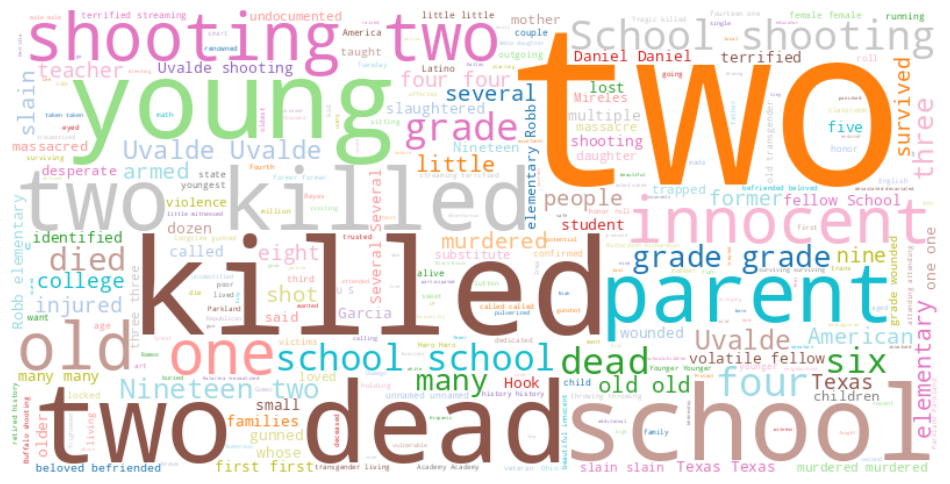

In [ ]:
# for VICTIM
# combine all the words in the "Token" column into a single string and make word-cloud
text = ' '.join(df_keywords_rels_victim['token'].values.tolist())
# text = ' '.join(df['Token'] + ' ' + df['Head'])

# create the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab20', max_words=None, stopwords=None).generate(text)
# wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab20').generate(text)
# wordcloud = WordCloud(background_color="white", width=800, height=400).generate(' '.join(df_keywords_rels['Token']))

# generate the word cloud
# wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab20').generate(text)

# plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Save the word cloud as a PNG file
wordcloud.to_file("wordcloud_victim.png")

In [ ]:
# save the WordCloud as a PNG file
# wordcloud.to_file("wordcloud_event.png")

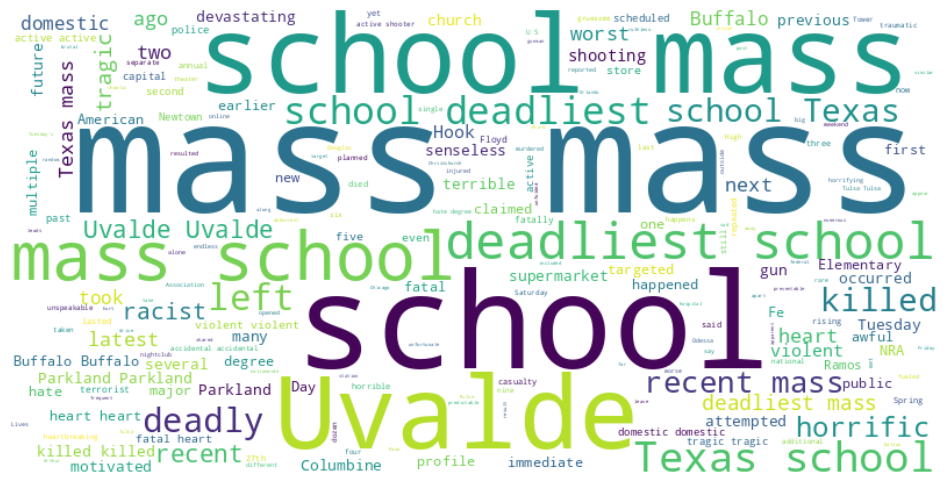

In [ ]:
# for EVENT

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Convert 'token' column to strings and remove NaN values
text = ' '.join(df_keywords_rels_event['token'].astype(str).dropna().values.tolist())

# Create a WordCloud object with optional customization (e.g., width, height, background color, etc.)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
# save the WordCloud as a PNG file
# wordcloud.to_file("wordcloud_event.png")

In [ ]:
# import os
# current_dir = os.getcwd()
# print(current_dir)

#### **RQ3: Is there a difference of using adjectives, adverbs, and other modifiers among the news media outlet (OR, between the right-leaning (conservative) and left-leaning (liberal) news media outlets) in the Texas mass shooting?**

In [ ]:
# Create new columns
df["shooter"] = 0
df["victim"] = 0
df["event"] = 0
df["all_keywords"] = 0

# Iterate over each row in the DataFrame
for i, row in df.iterrows():
    # Check if the Head and Relation match the shooter keywords and relations
    if row["head"] in shooter_keywords and row["relation"] in shooter_rels:
        df.loc[i, "shooter"] = 1

    # Check if the Head and Relation match the victim keywords and relations
    if row["head"] in victim_keywords and row["relation"] in victim_rels:
        df.loc[i, "victim"] = 1

    # Check if the Head and Relation match the event keywords and relations
    if row["head"] in event_keywords and row["relation"] in event_rels:
        df.loc[i, "event"] = 1

    # Check if the Head and Relation match the shooter/victim/event keywords and their relations
    if (row["head"] in shooter_keywords and row["relation"] in shooter_rels) | (row["head"] in victim_keywords and row["relation"] in victim_rels) | (row["head"] in event_keywords and row["relation"] in event_rels):
        df.loc[i, "all_keywords"] = 1

# df["all_keywords"] = df[["shooter", "victim", "event"]].sum(axis=1)

df.head(2)
# df.iloc[50:100, :].head(50)


,cor_in,doc_in,doc_id,token_id,token,token_pos,relation,head_id,head,head_pos,token_children,sentence,media,shooter,victim,event,all_keywords
0,1,1,NYT_01,0,,SPACE,dep,1,May,PROPN,[],"May 24, 2022.",NYT,0,0,0,0
1,2,1,NYT_01,1,May,PROPN,ROOT,1,May,PROPN,"[ , 24, ,, 2022, .]","May 24, 2022.",NYT,0,0,0,0


In [ ]:
df.tail(2)

,cor_in,doc_in,doc_id,token_id,token,token_pos,relation,head_id,head,head_pos,token_children,sentence,media,shooter,victim,event,all_keywords
1621540,1621541,1371,DMR_43_9,608,12:50,NUM,pobj,607,at,ADP,[],Another caller reported that eight or nine students were still alive about a half-hour before the Border Patrol team entered the classroom behind shields and shot the 18-year-old gunman dead at 12:50 p.m.,DMR,0,0,0,0
1621541,1621542,1371,DMR_43_9,609,p.m.,ADV,advmod,598,shot,VERB,[],Another caller reported that eight or nine students were still alive about a half-hour before the Border Patrol team entered the classroom behind shields and shot the 18-year-old gunman dead at 12:50 p.m.,DMR,0,0,0,0


In [ ]:
grouped_df_docid = df.groupby('doc_id')[['media', 'shooter', 'victim', 'event', "all_keywords"]].sum().reset_index()
print(grouped_df_docid.head)


<bound method NDFrame.head of                      doc_id  shooter  victim  event  all_keywords
0     DMN_01_100_https__www        1       2      1             4
1     DMN_03_102_https__www        1       4      7            12
2     DMN_04_103_https__www        1       6      4            11
3     DMN_05_104_https__www        0      16      3            19
4     DMN_06_105_https__www        1       7      7            15
...                     ...      ...     ...    ...           ...
1366              WSJ_48_64       18       0      4            22
1367              WSJ_49_65        2       0     11            13
1368               WSJ_51_7        8      16      5            29
1369               WSJ_54_8        8       5      6            19
1370               WSJ_55_9        0       7      3            10

[1371 rows x 5 columns]>


<ipython-input-33-a238c969dbcd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df_docid = df.groupby('doc_id')[['media', 'shooter', 'victim', 'event', "all_keywords"]].sum().reset_index()


In [ ]:
grouped_df_docid['media'] = grouped_df_docid['doc_id'].apply(lambda x: 'FOX' if 'FOX' in x or 'Fox' in x else ('NYT' if 'NYT' in x else ('WSJ' if 'WSJ' in x else ('cnn' if 'cnn' in x else 'Unknown'))))
grouped_df_docid

###############
# The following grouped_df_docid is saved as a csv and analyzed in spss as well

,doc_id,shooter,victim,event,all_keywords,media
0,DMN_01_100_https__www,1,2,1,4,Unknown
1,DMN_03_102_https__www,1,4,7,12,Unknown
2,DMN_04_103_https__www,1,6,4,11,Unknown
3,DMN_05_104_https__www,0,16,3,19,Unknown
4,DMN_06_105_https__www,1,7,7,15,Unknown
...,...,...,...,...,...,...
1366,WSJ_48_64,18,0,4,22,WSJ
1367,WSJ_49_65,2,0,11,13,WSJ
1368,WSJ_51_7,8,16,5,29,WSJ
1369,WSJ_54_8,8,5,6,19,WSJ


In [ ]:
# save the output for further analysis
# grouped_df_docid.to_csv('grouped_data_anova.csv', index=False)

In [ ]:
import os

# Get current working directory
dir_location = os.getcwd()

# Print directory location
print(dir_location)


/content


In [ ]:
# Now do ANOVA
import scipy.stats as stats

# Create a list of the four media outlets
media_list = ['FOX', 'NYT', 'WSJ', 'cnn']

# Create a dictionary to store the data for each media outlet
data_dict = {}
for media in media_list:
#     media_data = grouped_df_docid[grouped_df_docid['media'] == media]['all_keywords']
    media_data = grouped_df_docid[grouped_df_docid['media'] == media]['shooter']
#     media_data = grouped_df_docid[grouped_df_docid['media'] == media]['victim']
#     media_data = grouped_df_docid[grouped_df_docid['media'] == media]['event']

    data_dict[media] = media_data.values

# Perform one-way ANOVA test
f_value, p_value = stats.f_oneway(data_dict['FOX'], data_dict['NYT'], data_dict['WSJ'], data_dict['cnn'])

# Print the results
print("F-value:", f_value)
print("p-value:", p_value)


F-value: nan
p-value: nan


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [ ]:
df.head()

,cor_in,doc_in,doc_id,token_id,token,token_pos,relation,head_id,head,head_pos,token_children,sentence,media,shooter,victim,event,all_keywords
0,1,1,NYT_01,0,,SPACE,dep,1,May,PROPN,[],"May 24, 2022.",NYT,0,0,0,0
1,2,1,NYT_01,1,May,PROPN,ROOT,1,May,PROPN,"[ , 24, ,, 2022, .]","May 24, 2022.",NYT,0,0,0,0
2,3,1,NYT_01,2,24,NUM,nummod,1,May,PROPN,[],"May 24, 2022.",NYT,0,0,0,0
3,4,1,NYT_01,3,",",PUNCT,punct,1,May,PROPN,[],"May 24, 2022.",NYT,0,0,0,0
4,5,1,NYT_01,4,2022,NUM,npadvmod,1,May,PROPN,[],"May 24, 2022.",NYT,0,0,0,0


In [ ]:
# Find descriptive stats for keyword categories by media
grouped_df_docid.groupby('media')["all_keywords"].describe()

,count,mean,std,min,25%,50%,75%,max
media,,,,,,,,
NYT,227.0,16.832599,13.919115,0.0,7.0,14.0,23.0,81.0
Unknown,1097.0,17.625342,16.963922,0.0,8.0,14.0,22.0,258.0
WSJ,47.0,20.297872,15.586944,1.0,11.0,17.0,26.5,95.0


In [ ]:
# Find the NUMBER/PERCENTAGES of modifying words use by news media outlets

# create a filtered DataFrame based on the keywords and relations
filtered_df = df[(df["head"].isin(shooter_keywords) & df["relation"].isin(shooter_rels)) & ~(df['token'].isin(['Salvador', 'Rolando', 'Ramos', 'Mr.']))|
                 (df["head"].isin(victim_keywords) & df["relation"].isin(victim_rels)) |
                 (df["head"].isin(event_keywords) & df["relation"].isin(event_rels)) ]

# filtered_df = df[(df["Head"].isin(shooter_keywords) & df["Relation"].isin(shooter_rels))]
# filtered_df = df[(df["Head"].isin(victim_keywords) & df["Relation"].isin(victim_rels))]
# filtered_df = df[(df["Head"].isin(event_keywords) & df["Relation"].isin(event_rels))]

print(len(filtered_df))

# count the number of unique doc_id values in the filtered DataFrame by media_org
num_filtered_docs_by_group = filtered_df.groupby("media")["doc_id"].nunique()
print(num_filtered_docs_by_group)

# count the total number of unique doc_id values in the original DataFrame by media_org
num_total_docs_by_group = df.groupby("media")["doc_id"].nunique()
print(num_total_docs_by_group)

# calculate the percentage of news outlets using the keywords by media_org
percent_using_keywords_by_group = (num_filtered_docs_by_group / num_total_docs_by_group) * 100
percent_using_keywords_by_group

22502
media
DMN    153
DMR     28
INS     39
NYP    254
NYT    214
OGL     18
SSN     19
THL    224
UTO    127
WPO    224
WSJ     47
Name: doc_id, dtype: int64
media
DMN    155
DMR     28
INS     39
NYP    255
NYT    227
OGL     18
SSN     19
THL    227
UTO    128
WPO    228
WSJ     47
Name: doc_id, dtype: int64


media
DMN     98.709677
DMR    100.000000
INS    100.000000
NYP     99.607843
NYT     94.273128
OGL    100.000000
SSN    100.000000
THL     98.678414
UTO     99.218750
WPO     98.245614
WSJ    100.000000
Name: doc_id, dtype: float64

In [ ]:
# filtered_df.head()

In [ ]:
# df.head()

#### **RQ4 (Frames)**
* How do the left-leaning and right-leaning news outlets frame various entities like shooter, victim, and event in the Texas mass shooting


##### **BERT word embedding on modifying words based on resepctive sentence as a context**

In [ ]:
# # try word embedding for each modifier in "token" column based on respective sentence column's sentence
# !pip install transformers
# from transformers import BertTokenizer, BertModel
# import torch
# import pandas as pd


###### SHOOTER

In [ ]:
# SOOTER
filtered_df_shooter = df[(df["head"].isin(shooter_keywords) & df["relation"].isin(shooter_rels) & ~(df['token'].isin(['Salvador', 'Rolando', 'Ramos', 'Mr.'])))]  # Here, "& ~(df['Token'].isin(['Salvador', 'Rolando', 'Ramos', 'Mr.']))]" exclude rows where the value in the 'Token' column is "Salvador" or "Ramos"
print("Total rows with shooter keywords & relations:", len(filtered_df_shooter))

Total rows with shooter keywords & relations: 3312


In [ ]:
# # Load the pre-trained BERT model and tokenizer
# model_name = 'bert-base-uncased'
# tokenizer = BertTokenizer.from_pretrained(model_name)
# model = BertModel.from_pretrained(model_name)

# filtered_df_shooter_embed = pd.DataFrame(filtered_df_shooter)

# # Function to obtain BERT embeddings for a token
# def get_bert_embedding(token, sentence):
#     encoded = tokenizer.encode_plus(token, sentence, return_tensors='pt', padding=True, truncation=True, max_length=512)
#     with torch.no_grad():
#         output = model(**encoded)
#     token_embedding = output.last_hidden_state[0][0].numpy()
#     return token_embedding

# # Apply the function to each row in the DataFrame
# filtered_df_shooter_embed['embedding'] = filtered_df_shooter_embed.apply(lambda row: get_bert_embedding(row['token'], row['sentence']), axis=1)

In [ ]:
# filtered_df_shooter_embed.head(1)

In [ ]:
# # SAVE the file in pickle

# import pickle
# # Specify the file path where you want to save the pickle file
# # output_pickle_file = 'filtered_df_shooter_embed.pkl'
# output_pickle_file = '/content/drive/MyDrive/data/icwsm_sep_submission_2024_data/filtered_df_shooter_embed.pkl'

# # Save the DataFrame to a pickle file
# with open(output_pickle_file, 'wb') as file:
#     pickle.dump(filtered_df_shooter_embed, file)

# print(f"DataFrame with embeddings saved to {output_pickle_file}")

In [ ]:
# LOAD the SHOOTER file saved in pickle

import pickle
# Specify the path to the pickle file you want to load
# input_pickle_file = 'filtered_df_shooter_embed.pkl'
input_pickle_file = '/content/drive/MyDrive/data/icwsm_sep_submission_2024_data/filtered_df_shooter_embed.pkl'

# Load the DataFrame from the pickle file
with open(input_pickle_file, 'rb') as file:
    loaded_filtered_df_shooter_embed = pickle.load(file)

In [ ]:
# loaded_filtered_df_shooter_embed.head(1)

In [ ]:
print(loaded_filtered_df_shooter_embed.embedding.head(1))

116    [-0.52056324, -0.028214296, -0.13080035, -0.16744144, -0.14082484, -0.017265294, 0.4863234, 0.5131184, -0.39291856, -0.2708462, -0.80478746, -0.24490502, -0.37556, 0.3280871, -0.16378614, 0.26184875, 0.050474502, 0.3920913, 0.5507987, -0.29909626, 0.2701612, -0.5067844, 0.38324195, 0.06960946, 0.037400413, -0.39721176, -0.15401483, -0.43276793, -0.32948828, -0.34502935, -0.12607439, 0.38451254, -0.15531525, -0.28726357, 0.30846655, -0.048846353, 0.4914264, -0.021598361, 0.44040647, 0.29019168, -0.39822653, -0.19180658, 0.20916082, -0.10186382, 0.7234712, -0.22076058, -1.67456, -0.36183327, -0.4435332, 0.035599124, -0.006265849, -0.25004178, 0.6922906, 0.34912255, -0.074388, 0.48855838, -0.29794803, 0.5718937, 0.71948665, 0.44982076, 0.18838939, -0.12247553, 0.16885673, -0.3844279, -0.3490702, 0.26692542, 0.07555453, 0.56946135, -0.3593313, 0.032705717, -0.24944817, 0.18424976, 0.5511154, 0.26900673, -0.16728924, -0.02834164, -0.26146382, 0.031021623, -0.40892246, -0.43156424, 0.

In [ ]:
# k-MEANS clustering

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Extract the embedding vectors and convert them to a numpy array
embeddings = np.array(loaded_filtered_df_shooter_embed['embedding'].tolist())

# Specify the number of clusters you want
num_clusters = 4  # You can change this number as needed

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(embeddings)

# Add the cluster labels to a new column in your DataFrame
loaded_filtered_df_shooter_embed['cluster'] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# loaded_filtered_df_shooter_embed.head(1)

In [ ]:
# df_keywords_left = df_keywords[df_keywords['doc_id'].str.contains('NYT|WPO|UTO')]
# df_keywords_right = df_keywords[df_keywords['doc_id'].str.contains('WSJ|NYP|DMN')]
# df_keywords_least = df_keywords[df_keywords['doc_id'].str.contains('THL|INS|OGL|SSN|DMR')]

# left_centered if 'media' column contains ('NYT|WPO|UTO')
# right_centered if 'media' column contains ('WSJ|NYP|DMN')]
# least_biased if 'media' column contains('THL|INS|OGL|SSN|DMR')]


In [ ]:
# Group the filtered DataFrame by media, relation, and token

# ALL RELS: for victim's modifying words
grouped_shooter_df = loaded_filtered_df_shooter_embed.groupby(["cluster", "media", 'relation', "token"])["token"].count().reset_index(name="Frequency")
print(len(grouped_shooter_df))

# # ONLY 'AMOD': for victim's rels modifying words
# grouped_shooter_df = loaded_filtered_df_shooter_embed[loaded_filtered_df_shooter_embed["relation"] == "amod"]
# grouped_shooter_df = grouped_shooter_df.groupby(["cluster", "media", 'relation', "token"])["token"].count().reset_index(name="Frequency")
# print(len(grouped_shooter_df))


# Sort the DataFrame by frequency in descending order
grouped_shooter_df = grouped_shooter_df.sort_values(by="Frequency", ascending=False)
# grouped_df
print(len(grouped_shooter_df))

# Print the results for each cluster
for cluster in grouped_shooter_df["cluster"].unique():
    # print(grouped_shooter_df[(grouped_shooter_df["cluster"] == cluster)])
    print()

1027
1027






In [ ]:
# group by media groups
# all three

import numpy as np

# Define the conditions for grouping media
conditions = [
    loaded_filtered_df_shooter_embed['media'].str.contains('NYT|WPO|UTO'),
    loaded_filtered_df_shooter_embed['media'].str.contains('WSJ|NYP|DMN'),
    loaded_filtered_df_shooter_embed['media'].str.contains('THL|INS|OGL|SSN|DMR')
]

# Define the corresponding group names
groups = ['left_centered', 'right_centered', 'least_biased']

# Use np.select to create a new 'media_group' column based on conditions
loaded_filtered_df_shooter_embed['media_group'] = np.select(conditions, groups, default='other')

# Group by the new 'media_group' column instead of 'media'
grouped_shooter_df = loaded_filtered_df_shooter_embed.groupby(["cluster", "media_group", 'relation', "token"])["token"].count().reset_index(name="Frequency")
print(len(grouped_shooter_df))

# Sort the DataFrame by frequency in descending order
grouped_shooter_df = grouped_shooter_df.sort_values(by="Frequency", ascending=False)

# Print the results for each cluster
for cluster in grouped_shooter_df["cluster"].unique():
    print(grouped_shooter_df[(grouped_shooter_df["cluster"] == cluster)])
    print()


830
     cluster     media_group  relation       token  Frequency
578        2  right_centered  compound     shooter        123
544        2  right_centered  compound       Texas         81
563        2  right_centered  compound      gunman         79
546        2  right_centered  compound      Uvalde         39
393        2   left_centered      amod      Uvalde         37
..       ...             ...       ...         ...        ...
354        2    least_biased      amod      active          1
349        2    least_biased       acl  barricaded          1
350        2    least_biased       acl     charged          1
351        2    least_biased      amod   Confessed          1
353        2    least_biased      amod     accused          1

[237 rows x 5 columns]

    cluster     media_group  relation     token  Frequency
67        0  right_centered      amod       old        120
38        0   left_centered      amod       old         74
5         0    least_biased      amod       old   

In [ ]:
# Shooter - left, least, and right
# Iterate through unique clusters and exclude Cluster -1
for cluster in grouped_shooter_df["cluster"].unique():
    if cluster != -1:
        cluster_df = grouped_shooter_df[grouped_shooter_df["cluster"] == cluster]
        relation_groups = cluster_df.groupby(["relation", "token"])["Frequency"].sum().reset_index()

        # Sort words under each relation by frequency in descending order
        relation_groups = relation_groups.sort_values(by="Frequency", ascending=False)

        # Print the formatted output for each cluster
        print(f"Cluster {cluster}:")
        for relation in relation_groups["relation"].unique():
            relation_df = relation_groups[relation_groups["relation"] == relation]
            words_with_freq = [f"{token} ({frequency})" for token, frequency in zip(relation_df["token"], relation_df["Frequency"])]

            print(f"{relation}:")
            print(", ".join(words_with_freq))


Cluster 2:
compound:
shooter (123), Texas (114), gunman (84), Uvalde (68), Gunman (23), que (10), suspect (9), Florida (9), Stoneman (8), Tulsa (8), granddad (7), Tigard (7), Shooter (6), Buffalo (4), Ronaldo (3), felon (3), Teen (3), donde (3), Salvatore (3), murderer (3), school (3), barricaded (3), Cece (3), Cruz (3), dijo (2), de (2), a. (2), Yubo (2), Vegas (2), identificado (2), Queens (2), Massachusetts (2), Ohio (2), tirador (2), teen (2), Paso (2), shooting (2), recuerda (2), rifles (2), California (2), madman (2), Reagan (1), Rochester (1), Md.—The (1), Privacy (1), Napa (1), Parkland (1), Taliban (1), Payton (1), Salavdor (1), Salvator (1), Springs (1), Pskowski (1), Scotia (1), Propper (1), fiend (1), Valdez (1), maniac (1), weapons (1), valde (1), supremacist (1), supermarket (1), quien (1), muertos (1), monster (1), madre (1), Varios (1), línea (1), justo (1), jugaba (1), joven (1), identificaron (1), gunmanthe (1), Loner (1), era (1), cuando (1), compró (1), como (1), ba

In [ ]:
# Filter the DataFrame to see only the "LEFT_centered" group
left_centered_df = grouped_shooter_df[grouped_shooter_df['media_group'] == 'left_centered']

# Print the results for each cluster in the "left_centered" group
for cluster in left_centered_df["cluster"].unique():
    print(left_centered_df[left_centered_df["cluster"] == cluster])
    print()


     cluster    media_group  relation     token  Frequency
698        3  left_centered      amod       old         88
671        3  left_centered      amod    active         67
739        3  left_centered  compound    school         26
713        3  left_centered      amod     young         22
694        3  left_centered      amod      mass         16
..       ...            ...       ...       ...        ...
646        3  left_centered       acl  entering          1
643        3  left_centered       acl   casting          1
641        3  left_centered       acl    called          1
640        3  left_centered       acl  bursting          1
639        3  left_centered       acl    bought          1

[111 rows x 5 columns]

    cluster    media_group  relation         token  Frequency
38        0  left_centered      amod           old         74
30        0  left_centered      amod        active         19
36        0  left_centered      amod          mass          6
26        0  left_c

In [ ]:
# Shooter - left
# Iterate through unique clusters and exclude Cluster -1
for cluster in left_centered_df["cluster"].unique():
    if cluster != -1:
        cluster_df = left_centered_df[left_centered_df["cluster"] == cluster]
        relation_groups = cluster_df.groupby(["relation", "token"])["Frequency"].sum().reset_index()

        # Sort words under each relation by frequency in descending order
        relation_groups = relation_groups.sort_values(by="Frequency", ascending=False)

        # Print the formatted output for each cluster
        print(f"Cluster {cluster}:")
        for relation in relation_groups["relation"].unique():
            relation_df = relation_groups[relation_groups["relation"] == relation]
            words_with_freq = [f"{token} ({frequency})" for token, frequency in zip(relation_df["token"], relation_df["Frequency"])]

            print(f"{relation}:")
            print(", ".join(words_with_freq))


Cluster 3:
amod:
old (88), active (67), young (22), mass (16), armed (7), white (6), potential (6), White (5), bad (5), other (4), alleged (4), determined (3), black (3), next (3), accused (3), racist (3), purported (2), many (2), good (2), Black (2), right (2), typical (1), unsure (1), shooting (1), scarred (1), single (1), younger (1), lone (1), recent (1), professional (1), Australian (1), Many (1), Most (1), a (1), haired (1), prior (1), occasional (1), moving (1), masked (1), male (1), later (1), interested (1), future (1), constrained (1), fourth (1), enslaved (1), enough (1), destroyed (1), described (1), decent (1), deceased (1)
compound:
school (26), mass (10), . (3), a. (2), Buffalo (2), School (2), himself (1), videos (1), teacher (1), Arthur (1), shooting (1), delivery (1), Fe (1), point (1), person (1)
acl:
named (8), armed (4), accused (4), used (3), wearing (3), motivated (3), carrying (3), identified (3), arriving (2), approaching (2), driven (2), killed (2), targeting 

In [ ]:
# Filter the DataFrame to see only the "RIGHT_centered" group
right_centered_df = grouped_shooter_df[grouped_shooter_df['media_group'] == 'right_centered']

# Print the results for each cluster in the "left_centered" group
for cluster in right_centered_df["cluster"].unique():
    print(right_centered_df[right_centered_df["cluster"] == cluster])
    print()


     cluster     media_group  relation        token  Frequency
578        2  right_centered  compound      shooter        123
544        2  right_centered  compound        Texas         81
563        2  right_centered  compound       gunman         79
546        2  right_centered  compound       Uvalde         39
486        2  right_centered      amod     deranged         29
..       ...             ...       ...          ...        ...
469        2  right_centered       acl    motivated          1
470        2  right_centered       acl  radicalized          1
471        2  right_centered       acl    resonated          1
472        2  right_centered       acl         seen          1
473        2  right_centered       acl   suggesting          1

[120 rows x 5 columns]

    cluster     media_group  relation        token  Frequency
67        0  right_centered      amod          old        120
59        0  right_centered      amod       active         10
62        0  right_centered      

In [ ]:
# Shooter - right
# Iterate through unique clusters and exclude Cluster -1
for cluster in right_centered_df["cluster"].unique():
    if cluster != -1:
        cluster_df = right_centered_df[right_centered_df["cluster"] == cluster]
        relation_groups = cluster_df.groupby(["relation", "token"])["Frequency"].sum().reset_index()

        # Sort words under each relation by frequency in descending order
        relation_groups = relation_groups.sort_values(by="Frequency", ascending=False)

        # Print the formatted output for each cluster
        print(f"Cluster {cluster}:")
        for relation in relation_groups["relation"].unique():
            relation_df = relation_groups[relation_groups["relation"] == relation]
            words_with_freq = [f"{token} ({frequency})" for token, frequency in zip(relation_df["token"], relation_df["Frequency"])]

            print(f"{relation}:")
            print(", ".join(words_with_freq))


Cluster 2:
compound:
shooter (123), Texas (81), gunman (79), Uvalde (39), Gunman (23), que (10), granddad (7), Shooter (6), Tulsa (6), Florida (6), donde (3), murderer (3), Cece (3), felon (3), dijo (2), de (2), tirador (2), teen (2), identificado (2), Yubo (2), recuerda (2), Paso (2), madman (2), Salvatore (2), school (2), Varios (1), Valdez (1), autoridades (1), Salavdor (1), Springs (1), weapons (1), Teen (1), Salvator (1), era (1), barricaded (1), jugaba (1), muertos (1), monster (1), maniac (1), madre (1), línea (1), justo (1), joven (1), basquetbol (1), Propper (1), shooting (1), fiend (1), cuando (1), compró (1), como (1), Reagan (1), Privacy (1), Payton (1), Parkland (1), Md.—The (1), Loner (1), La (1), Gendron (1), Duncanville (1), Columbine (1), Carolina (1)
amod:
deranged (29), Uvalde (18), Alleged (8), irate (6), barricaded (5), hardworking (5), Suspected (2), alleged (2), demented (2), future (2), civilized (1), vile (1), unhinged (1), suspected (1), shooting (1), sadistic

In [ ]:
# Filter the DataFrame to see only the "LEAST_biased" group
least_biased_df = grouped_shooter_df[grouped_shooter_df['media_group'] == 'least_biased']

# Print the results for each cluster in the "left_centered" group
for cluster in least_biased_df["cluster"].unique():
    print(least_biased_df[least_biased_df["cluster"] == cluster])
    print()


     cluster   media_group  relation         token  Frequency
609        3  least_biased      amod           old         71
595        3  least_biased      amod        active         36
633        3  least_biased  compound        school         12
605        3  least_biased      amod          mass         10
630        3  least_biased  compound        School          9
621        3  least_biased      amod         young          9
603        3  least_biased      amod          lone          5
632        3  least_biased  compound          mass          4
618        3  least_biased      amod     suspected          4
613        3  least_biased      amod     potential          4
598        3  least_biased      amod       alleged          4
623        3  least_biased     appos          both          3
599        3  least_biased      amod         armed          3
624        3  least_biased     appos       himself          3
620        3  least_biased      amod         white          2
604     

In [ ]:
# Shooter - Least-biased
# Iterate through unique clusters and exclude Cluster -1
for cluster in least_biased_df["cluster"].unique():
    if cluster != -1:
        cluster_df = least_biased_df[least_biased_df["cluster"] == cluster]
        relation_groups = cluster_df.groupby(["relation", "token"])["Frequency"].sum().reset_index()

        # Sort words under each relation by frequency in descending order
        relation_groups = relation_groups.sort_values(by="Frequency", ascending=False)

        # Print the formatted output for each cluster
        print(f"Cluster {cluster}:")
        for relation in relation_groups["relation"].unique():
            relation_df = relation_groups[relation_groups["relation"] == relation]
            words_with_freq = [f"{token} ({frequency})" for token, frequency in zip(relation_df["token"], relation_df["Frequency"])]

            print(f"{relation}:")
            print(", ".join(words_with_freq))


Cluster 3:
amod:
old (71), active (36), mass (10), young (9), lone (5), potential (4), suspected (4), alleged (4), armed (3), many (2), other (2), teenage (2), white (2), Black (2), several (1), professional (1), separate (1), previous (1), adolescent (1), actual (1), bad (1), past (1), determined (1), enough (1), multiple (1), nationalist (1), next (1), own (1)
compound:
school (12), School (9), mass (4), Buffalo (2), Mass (1), hospital (1), straw (1)
appos:
himself (3), both (3), resident (2), miles (1), all (1), student (1)
acl:
armed (1), claiming (1), coming (1), identified (1), killing (1), man (1), wielding (1), called (1)
Cluster 0:
amod:
old (47), active (7), mass (3), troubled (1), public (1), other (1), menacing (1), large (1)
compound:
school (4), School (4), Mass (4), time (1), mass (1)
appos:
one (2), resident (1), man (1), nature (1), capability (1)
acl:
used (1)
nsubj:
I (1)
Cluster 1:
amod:
suspected (27), active (12), alleged (8), potential (4), armed (3), mass (2), d

###### VICTIM

In [ ]:
filtered_df_victim = df[(df["head"].isin(victim_keywords) & df["relation"].isin(victim_rels))]
print("Total rows with victim keywords & relations:", len(filtered_df_victim))

Total rows with victim keywords & relations: 9736


In [ ]:
# import pandas as pd
# import torch
# from transformers import BertTokenizer, BertModel

# # Load the pre-trained BERT model and tokenizer
# model_name = 'bert-base-uncased'
# tokenizer = BertTokenizer.from_pretrained(model_name)
# model = BertModel.from_pretrained(model_name)

# # Assuming you have a DataFrame filtered_df_victim
# filtered_df_victim_embed = filtered_df_victim.copy()

# # Function to obtain BERT embeddings for a token
# def get_bert_embedding(token, sentence):
#     if pd.notna(token) and pd.notna(sentence):  # Check for NaN values
#         encoded = tokenizer.encode_plus(token, sentence, return_tensors='pt', padding=True, truncation=True, max_length=512)
#         with torch.no_grad():
#             output = model(**encoded)
#         token_embedding = output.last_hidden_state[0][0].numpy()
#         return token_embedding
#     else:
#         return None  # Handle NaN values gracefully

# # Apply the function to each row in the DataFrame
# filtered_df_victim_embed['embedding'] = filtered_df_victim_embed.apply(lambda row: get_bert_embedding(row['token'], row['sentence']), axis=1)


In [ ]:
# filtered_df_victim_embed.head(1)

In [ ]:
# # SAVE the file in pickle

# import pickle
# # Specify the file path where you want to save the pickle file
# # output_pickle_file = 'filtered_df_victim_embed.pkl'
# output_pickle_file = '/content/drive/MyDrive/data/icwsm_sep_submission_2024_data/filtered_df_victim_embed.pkl'

# # Save the DataFrame to a pickle file
# with open(output_pickle_file, 'wb') as file:
#     pickle.dump(filtered_df_victim_embed, file)

# print(f"DataFrame with embeddings saved to {output_pickle_file}")

In [ ]:
# LOAD the file saved in pickle

import pickle
# Specify the path to the pickle file you want to load
# input_pickle_file = 'filtered_df_victim_embed.pkl'
input_pickle_file = '/content/drive/MyDrive/data/icwsm_sep_submission_2024_data/filtered_df_victim_embed.pkl'

# Load the DataFrame from the pickle file
with open(input_pickle_file, 'rb') as file:
    loaded_filtered_df_victim_embed = pickle.load(file)

In [ ]:
# loaded_filtered_df_victim_embed.head(1)

In [ ]:
print(loaded_filtered_df_victim_embed.embedding.head(1))

119    [-0.57579994, -0.09853469, 0.06472842, -0.11132247, 0.35147232, -0.86195195, 0.15877344, 0.41802248, -0.39618474, -0.3300117, -0.9520932, -0.17204222, -0.425834, 0.41327304, -0.26546064, 0.6587336, 0.22413352, 0.19070053, 0.4577762, -0.24145699, 0.58027256, -0.3849425, 0.5692878, 0.3507926, -0.35607114, -0.45511553, 0.18249191, -0.37704936, 0.16210288, -0.0026592298, -0.15827432, 0.38877717, -0.3652987, -0.036313806, 0.2506653, 0.0011847283, 0.6596833, 0.054889426, 0.3273047, 0.16524526, -0.082576536, -0.50668406, 0.12438371, -0.23186772, 1.0717041, -0.27137995, -1.4757335, -0.46745032, -0.3670999, 0.34442243, -0.46771663, -0.2229455, 0.50324506, 0.14561543, -0.40062904, 0.08561717, -0.29085287, 0.7219305, 0.27213645, 0.5855108, 0.38587344, -0.37064746, -0.039670467, -0.47003204, -0.2700924, 0.29453015, -0.08275893, 0.5171787, -0.4993542, -0.10812674, -0.3422038, -0.061548475, -0.21997444, -0.0037269474, -0.06007842, 0.02900645, -0.6966426, 0.02999617, -0.42985797, -0.278643, 0.

In [ ]:
# # Check the length of each embedding in the "embedding" column
# embedding_lengths = [len(embedding) for embedding in loaded_filtered_df_victim_embed['embedding']]

# # Print the lengths
# print(embedding_lengths)

In [ ]:
# k-MEANS clustering

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Remove rows with missing embeddings
loaded_filtered_df_victim_embed_cl = loaded_filtered_df_victim_embed.dropna(subset=['embedding'])

# Extract the embedding vectors and convert them to a list of NumPy arrays
embeddings = [np.array(embedding) for embedding in loaded_filtered_df_victim_embed_cl['embedding']]

# Check if all embedding vectors have the same length
embedding_lengths = [len(embedding) for embedding in embeddings]
if len(set(embedding_lengths)) != 1:
    raise ValueError("Not all embedding vectors have the same length.")

# Convert the list of embedding arrays to a NumPy array
embeddings = np.array(embeddings)

# Specify the number of clusters you want
num_clusters = 4  # You can change this number as needed

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(embeddings)

# Add the cluster labels to a new column in your DataFrame
loaded_filtered_df_victim_embed_cl['cluster'] = cluster_labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-86-df17958ced94>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loaded_filtered_df_victim_embed_cl['cluster'] = cluster_labels


In [ ]:
# loaded_filtered_df_victim_embed_cl.head(1)

In [ ]:
# Group the filtered DataFrame by media, relation, and token

# ALL RELS: for victim's modifying words
grouped_victim_df = loaded_filtered_df_victim_embed_cl.groupby(["cluster", "media", 'relation', "token"])["token"].count().reset_index(name="Frequency")
print(len(grouped_victim_df))

# # ONLY 'AMOD': for victim's rels modifying words
# grouped_victim_df = loaded_filtered_df_victim_embed_cl[loaded_filtered_df_victim_embed_cl["relation"] == "amod"]
# grouped_victim_df = grouped_victim_df.groupby(["cluster", "media", 'relation', "token"])["token"].count().reset_index(name="Frequency")
# print(len(grouped_victim_df))


# Sort the DataFrame by frequency in descending order
grouped_victim_df = grouped_victim_df.sort_values(by="Frequency", ascending=True)
# grouped_df
print(len(grouped_victim_df))

# Print the results for each cluster
for cluster in grouped_victim_df["cluster"].unique():
    # print(grouped_victim_df[(grouped_victim_df["cluster"] == cluster)])
    print()

3033
3033






In [ ]:
# group by media groups
# all three

import numpy as np

# Define the conditions for grouping media
conditions = [
    loaded_filtered_df_victim_embed_cl['media'].str.contains('NYT|WPO|UTO'),
    loaded_filtered_df_victim_embed_cl['media'].str.contains('WSJ|NYP|DMN'),
    loaded_filtered_df_victim_embed_cl['media'].str.contains('THL|INS|OGL|SSN|DMR')
]

# Define the corresponding group names
groups = ['left_centered', 'right_centered', 'least_biased']

# Use np.select to create a new 'media_group' column based on conditions
loaded_filtered_df_victim_embed_cl['media_group'] = np.select(conditions, groups, default='other')

# Group by the new 'media_group' column instead of 'media'
grouped_victim_df = loaded_filtered_df_victim_embed_cl.groupby(["cluster", "media_group", 'relation', "token"])["token"].count().reset_index(name="Frequency")
print(len(grouped_victim_df))

# Sort the DataFrame by frequency in descending order
grouped_victim_df = grouped_victim_df.sort_values(by="Frequency", ascending=False)

# Print the results for each cluster
for cluster in grouped_victim_df["cluster"].unique():
    print(grouped_victim_df[(grouped_victim_df["cluster"] == cluster)])
    print()


2254
     cluster     media_group relation     token  Frequency
216        0   left_centered   nummod        19        346
387        0  right_centered   nummod        19        343
244        0   left_centered   nummod       two        294
410        0  right_centered   nummod       two        283
71         0    least_biased   nummod        19        168
..       ...             ...      ...       ...        ...
246        0   left_centered     poss        my          1
234        0   left_centered   nummod  Thirteen          1
231        0   left_centered   nummod      Nine          1
230        0   left_centered   nummod   Fifteen          1
229        0   left_centered   nummod        84          1

[438 rows x 5 columns]

      cluster     media_group  relation      token  Frequency
1170        2   left_centered    nummod         19        149
1202        2   left_centered    nummod        two        139
1442        2  right_centered    nummod        two         97
1418        2 

<ipython-input-89-1ee707a8acf0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loaded_filtered_df_victim_embed_cl['media_group'] = np.select(conditions, groups, default='other')


In [ ]:
# Victim - left, least, and right
# Iterate through unique clusters and exclude Cluster -1
for cluster in grouped_victim_df["cluster"].unique():
    if cluster != -1:
        cluster_df = grouped_victim_df[grouped_victim_df["cluster"] == cluster]
        relation_groups = cluster_df.groupby(["relation", "token"])["Frequency"].sum().reset_index()

        # Sort words under each relation by frequency in descending order
        relation_groups = relation_groups.sort_values(by="Frequency", ascending=False)

        # Print the formatted output for each cluster
        print(f"Cluster {cluster}:")
        for relation in relation_groups["relation"].unique():
            relation_df = relation_groups[relation_groups["relation"] == relation]
            words_with_freq = [f"{token} ({frequency})" for token, frequency in zip(relation_df["token"], relation_df["Frequency"])]

            print(f"{relation}:")
            print(", ".join(words_with_freq))


Cluster 0:
nummod:
19 (857), two (723), 21 (43), 20 (36), Nineteen (29), 14 (27), four (26), three (21), 17 (20), one (14), 18 (14), Three (13), six (13), Two (12), 2 (10), eight (8), One (7), 12 (6), nine (6), 11 (5), 26 (5), 250 (5), 15 (4), 13 (4), 30 (4), dozen (3), 150 (3), fourteen (3), 200 (3), 600 (2), 100 (2), 10 (2), million (2), 40 (2), 23 (2), 16 (2), twenty (1), 6- (1), 620 (1), 84 (1), 93 (1), Fifteen (1), Five (1), Four (1), Fourteen (1), Nine (1), Thirteen (1), 570 (1), 6 (1), 550 (1), 500 (1), 132 (1), 134 (1), 281 (1), 33 (1), 1 (1)
amod:
dead (103), old (53), young (34), other (31), several (16), elementary (14), Several (13), former (11), slain (11), female (9), many (9), innocent (8), American (7), shooting (7), more (6), murdered (6), terrified (6), multiple (5), injured (5), third (5), wounded (4), unidentified (4), outgoing (4), additional (3), recent (3), alive (3), youngest (3), surviving (3), desperate (3), little (3), confirmed (3), younger (2), trapped (2),

In [ ]:
# Filter the DataFrame to see only the "LEFT_centered" group
left_centered_victim_df = grouped_victim_df[grouped_victim_df['media_group'] == 'left_centered']

# Print the results for each cluster in the "left_centered" group
for cluster in left_centered_victim_df["cluster"].unique():
    print(left_centered_victim_df[left_centered_victim_df["cluster"] == cluster])
    print()

     cluster    media_group  relation     token  Frequency
216        0  left_centered    nummod        19        346
244        0  left_centered    nummod       two        294
116        0  left_centered       acl    killed         41
134        0  left_centered      amod      dead         32
198        0  left_centered  compound    school         19
..       ...            ...       ...       ...        ...
246        0  left_centered      poss        my          1
234        0  left_centered    nummod  Thirteen          1
231        0  left_centered    nummod      Nine          1
230        0  left_centered    nummod   Fifteen          1
229        0  left_centered    nummod        84          1

[164 rows x 5 columns]

      cluster    media_group  relation      token  Frequency
1170        2  left_centered    nummod         19        149
1202        2  left_centered    nummod        two        139
1222        2  left_centered      poss         my         76
1227        2  left_cen

In [ ]:
# Victim - left
# Iterate through unique clusters and exclude Cluster -1
for cluster in left_centered_victim_df["cluster"].unique():
    if cluster != -1:
        cluster_df = left_centered_victim_df[left_centered_victim_df["cluster"] == cluster]
        relation_groups = cluster_df.groupby(["relation", "token"])["Frequency"].sum().reset_index()

        # Sort words under each relation by frequency in descending order
        relation_groups = relation_groups.sort_values(by="Frequency", ascending=False)

        # Print the formatted output for each cluster
        print(f"Cluster {cluster}:")
        for relation in relation_groups["relation"].unique():
            relation_df = relation_groups[relation_groups["relation"] == relation]
            words_with_freq = [f"{token} ({frequency})" for token, frequency in zip(relation_df["token"], relation_df["Frequency"])]

            print(f"{relation}:")
            print(", ".join(words_with_freq))


Cluster 0:
nummod:
19 (346), two (294), 20 (16), 21 (15), three (15), Nineteen (13), four (13), 14 (12), six (8), eight (5), 2 (4), One (4), 18 (4), 30 (4), Two (3), 26 (3), 200 (3), 17 (3), 12 (3), Three (2), million (2), nine (2), one (2), 250 (1), 16 (1), 33 (1), 500 (1), 550 (1), 6- (1), 620 (1), 84 (1), Fifteen (1), 150 (1), Nine (1), Thirteen (1), 134 (1), 132 (1), 13 (1), 11 (1), 1 (1)
acl:
killed (41), living (4), murdered (4), called (2), affected (1), trapped (1), slain (1), running (1), picking (1), fleeing (1), evacuated (1), confirmed (1), calling (1), bringing (1)
amod:
dead (32), old (12), other (11), young (10), several (8), many (7), former (7), slain (6), Several (6), elementary (5), female (5), American (5), wounded (4), third (3), surviving (3), confirmed (3), desperate (3), injured (3), innocent (3), more (3), substitute (2), Hispanic (2), multiple (2), shooting (2), armed (2), younger (2), suspected (1), potential (1), outgoing (1), only (1), next (1), murdered (1

In [ ]:
# Filter the DataFrame to see only the "RIGHT_centered" group
right_centered_victim_df = grouped_victim_df[grouped_victim_df['media_group'] == 'right_centered']

# Print the results for each cluster in the "left_centered" group
for cluster in right_centered_df["cluster"].unique():
    print(right_centered_victim_df[right_centered_victim_df["cluster"] == cluster])
    print()


      cluster     media_group  relation     token  Frequency
1442        2  right_centered    nummod       two         97
1418        2  right_centered    nummod        19         79
1392        2  right_centered  compound     grade         46
1463        2  right_centered      poss     their         46
1381        2  right_centered  compound    School         42
...       ...             ...       ...       ...        ...
1314        2  right_centered       acl      shot          1
1313        2  right_centered       acl   running          1
1312        2  right_centered       acl  murdered          1
1311        2  right_centered       acl    laying          1
1309        2  right_centered       acl    gunned          1

[201 rows x 5 columns]

     cluster     media_group  relation     token  Frequency
387        0  right_centered    nummod        19        343
410        0  right_centered    nummod       two        283
288        0  right_centered       acl    killed         35
301

In [ ]:
# Victim - right
# Iterate through unique clusters and exclude Cluster -1
for cluster in right_centered_victim_df["cluster"].unique():
    if cluster != -1:
        cluster_df = right_centered_victim_df[right_centered_victim_df["cluster"] == cluster]
        relation_groups = cluster_df.groupby(["relation", "token"])["Frequency"].sum().reset_index()

        # Sort words under each relation by frequency in descending order
        relation_groups = relation_groups.sort_values(by="Frequency", ascending=False)

        # Print the formatted output for each cluster
        print(f"Cluster {cluster}:")
        for relation in relation_groups["relation"].unique():
            relation_df = relation_groups[relation_groups["relation"] == relation]
            words_with_freq = [f"{token} ({frequency})" for token, frequency in zip(relation_df["token"], relation_df["Frequency"])]

            print(f"{relation}:")
            print(", ".join(words_with_freq))


Cluster 0:
nummod:
19 (343), two (283), 21 (26), 20 (12), 18 (10), one (9), Nineteen (9), Two (6), four (6), 17 (6), Three (4), three (4), 15 (4), 250 (4), 14 (4), 2 (3), fourteen (3), 600 (2), 10 (2), 40 (2), 12 (2), 23 (2), 11 (2), nine (2), 13 (1), Five (1), 150 (1), 16 (1), Fourteen (1), 26 (1), six (1), 570 (1), eight (1), 93 (1)
acl:
killed (35), attending (6), shot (5), calling (2), called (2), locked (2), Give (1), slain (1), recalled (1), put (1), injured (1), impacted (1), holding (1), held (1), gunned (1), expelled (1), detained (1), defined (1), covered (1), bleeding (1), affected (1)
amod:
dead (33), old (25), young (18), other (16), elementary (8), several (7), Several (6), terrified (5), murdered (5), slain (5), unidentified (4), shooting (3), innocent (3), targeted (2), youngest (2), fatal (2), fellow (2), first (2), former (2), more (2), multiple (2), Black (1), many (1), longtime (1), injured (1), hysterical (1), frightened (1), frequent (1), fourth (1), eyed (1), dec

In [ ]:
# Filter the DataFrame to see only the "LEAST_biased" group
least_biased_victim_df = grouped_victim_df[grouped_victim_df['media_group'] == 'least_biased']

# Print the results for each cluster in the "left_centered" group
for cluster in least_biased_df["cluster"].unique():
    print(least_biased_victim_df[least_biased_victim_df["cluster"] == cluster])
    print()


      cluster   media_group relation         token  Frequency
1628        3  least_biased     poss           our         28
1613        3  least_biased   nummod            19         26
1523        3  least_biased     amod        Uvalde         25
1624        3  least_biased     poss           Our         23
1506        3  least_biased      acl        killed         22
...       ...           ...      ...           ...        ...
1632        3  least_biased    relcl  hospitalized          1
1631        3  least_biased    relcl      affected          1
1645        3  least_biased    relcl     treasured          1
1646        3  least_biased    relcl          vote          1
1648        3  least_biased    relcl          were          1

[147 rows x 5 columns]

    cluster   media_group  relation         token  Frequency
71        0  least_biased    nummod            19        168
91        0  least_biased    nummod           two        146
20        0  least_biased      amod          dea

In [ ]:
# Victim - least-biased
# Iterate through unique clusters and exclude Cluster -1
for cluster in least_biased_victim_df["cluster"].unique():
    if cluster != -1:
        cluster_df = least_biased_victim_df[least_biased_victim_df["cluster"] == cluster]
        relation_groups = cluster_df.groupby(["relation", "token"])["Frequency"].sum().reset_index()

        # Sort words under each relation by frequency in descending order
        relation_groups = relation_groups.sort_values(by="Frequency", ascending=False)

        # Print the formatted output for each cluster
        print(f"Cluster {cluster}:")
        for relation in relation_groups["relation"].unique():
            relation_df = relation_groups[relation_groups["relation"] == relation]
            words_with_freq = [f"{token} ({frequency})" for token, frequency in zip(relation_df["token"], relation_df["Frequency"])]

            print(f"{relation}:")
            print(", ".join(words_with_freq))


Cluster 0:
nummod:
19 (168), two (146), 14 (11), 17 (11), 20 (8), Nineteen (7), Three (7), four (7), six (4), one (3), 2 (3), Two (3), dozen (3), One (3), nine (2), 13 (2), 11 (2), 100 (2), 21 (2), eight (2), three (2), 150 (1), Four (1), 6 (1), 26 (1), 281 (1), twenty (1), 12 (1)
amod:
dead (38), old (16), young (6), female (4), other (4), alive (3), outgoing (3), additional (3), former (2), recent (2), alleged (2), little (2), innocent (2), shooting (2), estimated (1), elementary (1), angry (1), Several (1), Mexican (1), American (1), - (1), few (1), fallen (1), injured (1), super (1), trapped (1), third (1), standardized (1), local (1), small (1), several (1), own (1), multiple (1), more (1), many (1), male (1)
compound:
school (19), shooting (7), grade (5), School (4), violence (3), parents (3), Robb (3), Hook (2), mother (2), people (1), gunshot (1), age (1), adult (1), State (1), children (1)
acl:
killed (11), called (2), accused (1), using (1), taken (1), subjected (1), standing

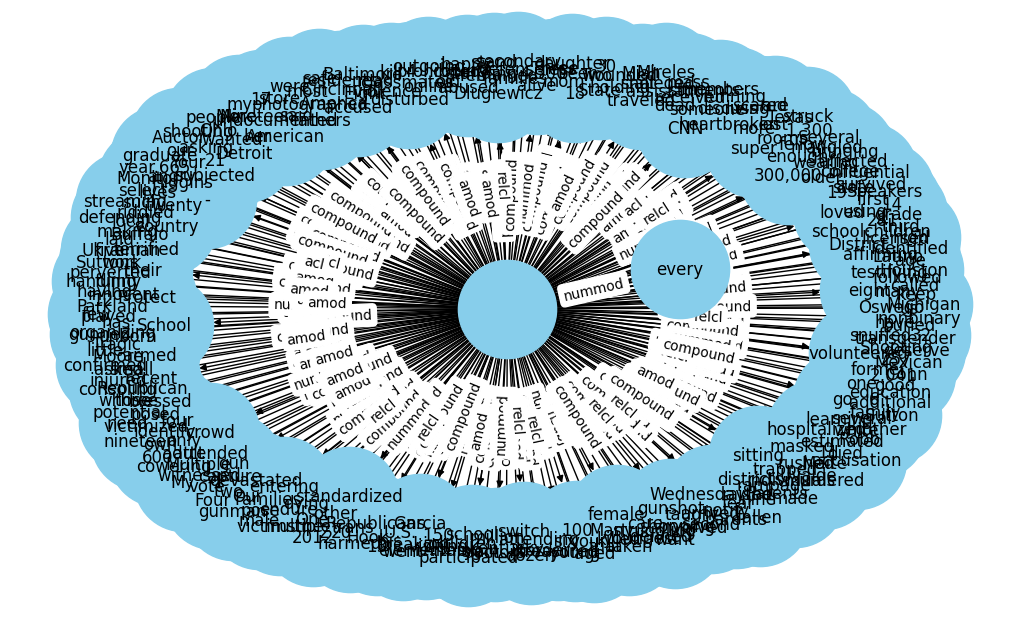

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add the central node "victims"
G.add_node("victims")

# Sample data (replace this with your actual data from least_biased_df)
data = least_biased_df.to_dict("records")

# Add nodes and edges for tokens and their relations
for item in data:
    token = item["token"]
    relation = item["relation"]

    # Add the token node
    G.add_node(token)

    # Add an edge from "victims" to the token with the relation label
    G.add_edge("victims", token, relation=relation)

# Draw the graph
pos = nx.spring_layout(G, seed=42)
labels = {node: node if node != "victims" else "" for node in G.nodes()}
edge_labels = {(u, v): d["relation"] for u, v, d in G.edges(data=True)}

plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, labels=labels, node_size=5000, node_color="skyblue", font_size=12)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.axis("off")
plt.show()


###### EVENT

In [ ]:
filtered_df_event = df[(df["head"].isin(event_keywords) & df["relation"].isin(event_rels))]
print("Total rows with event keywords & relations:", len(filtered_df_event))

NameError: ignored

In [ ]:
# import pandas as pd
# import torch
# from transformers import BertTokenizer, BertModel

# # Load the pre-trained BERT model and tokenizer
# model_name = 'bert-base-uncased'
# tokenizer = BertTokenizer.from_pretrained(model_name)
# model = BertModel.from_pretrained(model_name)

# # Assuming you have a DataFrame filtered_df_victim
# filtered_df_event_embed = filtered_df_event.copy()

# # Function to obtain BERT embeddings for a token
# def get_bert_embedding(token, sentence):
#     if pd.notna(token) and pd.notna(sentence):  # Check for NaN values
#         encoded = tokenizer.encode_plus(token, sentence, return_tensors='pt', padding=True, truncation=True, max_length=512)
#         with torch.no_grad():
#             output = model(**encoded)
#         token_embedding = output.last_hidden_state[0][0].numpy()
#         return token_embedding
#     else:
#         return None  # Handle NaN values gracefully

# # Apply the function to each row in the DataFrame
# filtered_df_event_embed['embedding'] = filtered_df_event_embed.apply(lambda row: get_bert_embedding(row['token'], row['sentence']), axis=1)


In [ ]:
filtered_df_event_embed.head(1)

In [ ]:
# SAVE the file in pickle

import pickle
# Specify the file path where you want to save the pickle file
# output_pickle_file = 'filtered_df_event_embed.pkl'
output_pickle_file = '/content/drive/MyDrive/data/icwsm_sep_submission_2024_data/filtered_df_event_embed.pkl'

# Save the DataFrame to a pickle file
with open(output_pickle_file, 'wb') as file:
    pickle.dump(filtered_df_event_embed, file)

print(f"DataFrame with embeddings saved to {output_pickle_file}")

In [ ]:
# LOAD the file saved in pickle

import pickle
# Specify the path to the pickle file you want to load
# input_pickle_file = 'filtered_df_event_embed.pkl'
input_pickle_file = '/content/drive/MyDrive/data/icwsm_sep_submission_2024_data/filtered_df_event_embed.pkl'

# Load the DataFrame from the pickle file
with open(input_pickle_file, 'rb') as file:
    loaded_filtered_df_event_embed = pickle.load(file)

In [ ]:
filtered_df_event_embed.head(1)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Extract the embedding vectors and convert them to a numpy array
embeddings = np.array(filtered_df_event_embed['embedding'].tolist())

# Specify the number of clusters you want
num_clusters = 5  # You can change this number as needed

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(embeddings)

# Add the cluster labels to a new column in your DataFrame
filtered_df_event_embed['cluster'] = cluster_labels

In [ ]:
# # Save the file as csv
# filtered_df_event_embed.to_csv('/content/drive/MyDrive/data/icwsm_sep_submission_2024_data/filtered_df_event_embed.csv', index=False)


In [ ]:
# LOAD csv file
filtered_df_event_embed_saved = pd.read_csv('/content/drive/filtered_df_event_embed.csv')


In [ ]:
print(filtered_df_event_embed_saved.embedding.head(1))

0    [-3.17414999e-01  1.01609938e-01 -6.07666731e-01 -4.55283225e-01\n -9.16496634e-01  2.18995765e-01  9.04551804e-01  6.96725368e-01\n  7.41220787e-02  3.95055413e-02 -2.66314834e-01 -7.08133459e-01\n -1.70377687e-01  8.56029809e-01  5.49892426e-01 -4.29745913e-01\n  1.17772244e-01  1.06649554e+00  8.38726938e-01 -4.83243652e-02\n -2.71371361e-02 -5.04190683e-01  4.75036979e-01  5.12094498e-02\n -2.46718615e-01 -4.20073122e-01 -1.55954778e-01 -2.67227054e-01\n -1.13461822e-01 -6.82870924e-01 -6.78161383e-02  7.75518179e-01\n -2.83134520e-01 -4.99454230e-01  4.26874787e-01 -3.38585496e-01\n  5.06541371e-01 -7.95519426e-02  6.29735947e-01  3.41966122e-01\n -5.01157403e-01 -6.12181723e-01  6.03975832e-01  1.36402816e-01\n  3.15622091e-01 -5.93827426e-01 -1.70532882e+00 -2.36534372e-01\n -5.31647444e-01  1.96216598e-01  5.51205575e-01 -3.64796281e-01\n  9.03094172e-01  6.32756650e-01 -3.24113965e-02  1.06079650e+00\n -1.52186394e-01 -4.35747765e-02  7.19064713e-01  3.82271498e-01\n  2.3

### **tf-idf vectors** after selecting the modifyign words

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Filter the DataFrame by the shooter & victim & event keywords and relations
filtered_df = df[(df["head"].isin(shooter_keywords) & df["relation"].isin(shooter_rels)) & ~(df['token'].isin(['Salvador', 'Rolando', 'Ramos', 'Mr.'])) |
                  (df["head"].isin(victim_keywords) & df["relation"].isin(victim_rels)) |
                  (df["head"].isin(event_keywords) & df["relation"].isin(event_rels))]

# Filter the DataFrame by the shooter keywords and relations
shooter_df = df[(df["head"].isin(shooter_keywords)) & (df["relation"].isin(shooter_rels)) & ~(df['token'].isin(['Salvador', 'Rolando', 'Ramos', 'Mr.'])) ]

# Filter the DataFrame by the victim keywords and relations
victim_df = df[(df["head"].isin(victim_keywords)) & (df["relation"].isin(victim_rels))]

# Filter the DataFrame by the event keywords and relations
event_df = df[(df["head"].isin(event_keywords)) & (df["relation"].isin(event_rels))]


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# df = pd.DataFrame(data)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Preprocess the text data (already tokenized)
tokens = filtered_df['token']
documents = [' '.join(token) for token in tokens]

# Fit the TF-IDF vectorizer on your text data
tfidf_vectorizer.fit(documents)

# Create an empty list to store the TF-IDF vectors
tfidf_vectors_list = []

# Iterate through the DataFrame rows
for _, row in filtered_df.iterrows():
    # Get the token for the current row
    token = row['token']

    # Compute the TF-IDF vector for the token
    tfidf_vector = tfidf_vectorizer.transform([' '.join(token)])

    # Append the TF-IDF vector to the list
    tfidf_vectors_list.append(tfidf_vector.toarray())

# Convert the list of TF-IDF vectors to a DataFrame
tfidf_vectors_df = pd.DataFrame(tfidf_vectors_list, columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate the original DataFrame (df) and the TF-IDF DataFrame (tfidf_vectors_df) horizontally
result_df = pd.concat([filtered_df, tfidf_vectors_df], axis=1)

TypeError: ignored

In [ ]:
shooter_df.head()

,cor_in,doc_in,doc_id,token_id,token,token_pos,relation,head_id,head,head_pos,token_children,sentence,media,shooter,victim,event,all_keywords
116,117,2,NYT_02,57,killed,VERB,acl,56,gunman,NOUN,"[children, on, in]","UVALDE, Texas — A gunman killed at least 19 ch...",NYT,1,0,0,1
229,230,2,NYT_02,170,old,ADJ,amod,171,man,NOUN,"[year, -]","The gunman, whom the authorities identified as...",NYT,1,0,0,1
3263,3264,3,NYT_03,1037,active,ADJ,amod,1038,shooter,NOUN,[],The school district posts on Facebook that the...,NYT,1,0,0,1
4292,4293,4,NYT_04,225,18,NUM,appos,223,Ramos,PROPN,[],The exchange adds to the wealth of evidence th...,NYT,1,0,0,1
4459,4460,4,NYT_04,392,school,NOUN,compound,393,shooter,NOUN,[],One of Salvador Ramos co-workers at the Wendy’...,NYT,1,0,0,1


In [ ]:
import pandas as pd

# Assuming output_data is a list of lists
data = output_data

# Define the column names for your DataFrame, including the "embedding" column
# columns = ['c_in', 'd_in', 'doc_id', 'T_i_d', 'Token', 't_POS', 'Relation', 'Head_i', 'Head', 'h_POS', 'Children', 'Sentence', 'embedding']

# Create the DataFrame
df = pd.DataFrame(data, columns=columns)

# # Save the DataFrame as a CSV file (you can change the file name as needed)
# csv_file_path = 'output_data_with_embeddings.csv'
# df.to_csv(csv_file_path, index=False)

# Display the first few rows of the DataFrame
df.head()


,c_in,d_in,doc_id,T_i_d,Token,t_POS,Relation,Head_i,Head,h_POS,Children,Sentence,embedding
0,1,1,NYT_01,0,May,PROPN,nmod,7,Russa,PROPN,"[28, ,, 2022]","May 28, 2022\n\nTony La Russa on Gabe Kapler: ...","[-0.5668106079101562, 0.10987728089094162, 0.1..."
1,2,1,NYT_01,1,28,NUM,nummod,0,May,PROPN,[],"May 28, 2022\n\nTony La Russa on Gabe Kapler: ...","[-0.47735103964805603, 0.21609729528427124, -0..."
2,3,1,NYT_01,2,",",PUNCT,punct,0,May,PROPN,[],"May 28, 2022\n\nTony La Russa on Gabe Kapler: ...","[-0.3393658697605133, 0.22071407735347748, 0.0..."
3,4,1,NYT_01,3,2022,NUM,nummod,0,May,PROPN,[\n\n],"May 28, 2022\n\nTony La Russa on Gabe Kapler: ...","[-0.5838944315910339, -0.05559874698519707, 0...."
4,5,1,NYT_01,4,\n\n,SPACE,dep,3,2022,NUM,[],"May 28, 2022\n\nTony La Russa on Gabe Kapler: ...","[-1.0533969402313232, -0.41769149899482727, -0..."


### Load files from directories

In [ ]:
# folders' links to all news outlets

# NYT - left-centered
folder_path_nyt = '/content/drive/MyDrive/data/icwsm_2024_data/data_nyt_262'
all_files_nyt = glob.glob(folder_path_nyt+ "/*txt")
print(len(all_files_nyt))
print(all_files_nyt[0])

262
/content/drive/MyDrive/data/icwsm_2024_data/data_nyt_262/NYT_28.2. Georgia Primary Election Results.txt


In [ ]:
# WPO - left-centered
folder_path_wpo = '/content/drive/MyDrive/data/icwsm_2024_data/data_wpo_290'
all_files_wpo = glob.glob(folder_path_wpo+ "/*txt")
print(len(all_files_wpo))
print(all_files_wpo[0])

290
/content/drive/MyDrive/data/icwsm_2024_data/data_wpo_290/WPO_09. How the official accounts about the Uvalde shooting have changed - The Washington Post.txt


In [ ]:
# UTO - left-centered
folder_path_uto = '/content/drive/MyDrive/data/icwsm_2024_data/data_uto_246_renamed'
all_files_uto = glob.glob(folder_path_uto+ "/*txt")
print(len(all_files_uto))
print(all_files_uto[0])

246
/content/drive/MyDrive/data/icwsm_2024_data/data_uto_246_renamed/UTO_153_238_https__mmajunkie.usatoday.com_lists_ufc-on-espn-37-mma-judging-calvin-kattar-josh-emmett-split-decision-main-event-result.txt


In [ ]:
# WSJ - right-centered
folder_path_wsj = '/content/drive/MyDrive/data/icwsm_2024_data/data_wsj_55_renamed'
all_files_wsj = glob.glob(folder_path_wsj+ "/*txt")
print(len(all_files_wsj))
print(all_files_wsj[0])

55
/content/drive/MyDrive/data/icwsm_2024_data/data_wsj_55_renamed/WSJ_46_60. Accused Buffalo Supermarket Shooter Payton Gendron Charged With Federal Hate Crimes.txt


In [ ]:
# NYP - right-centered
folder_path_nyp = '/content/drive/MyDrive/data/icwsm_2024_data/data_nyp_294_renamed'
all_files_nyp = glob.glob(folder_path_nyp+ "/*txt")
print(len(all_files_nyp))
print(all_files_nyp[0])

294
/content/drive/MyDrive/data/icwsm_2024_data/data_nyp_294_renamed/NYP_137_224_https__nypost.com_2022_05_27_feds-probing-if-retired-agent-had-notice-of-alleged-buffalo-shooter-report_.txt


In [ ]:
# DMN - right-centered
folder_path_dmn = '/content/drive/MyDrive/data/icwsm_2024_data/data_dmn_281_renamed'
all_files_dmn = glob.glob(folder_path_dmn+ "/*txt")
print(len(all_files_dmn))
print(all_files_dmn[0])

140
/content/drive/MyDrive/data/icwsm_2024_data/data_dmn_281_renamed/DMN_129_218_https__www.dallasnews.com_news_elections_2022_05_24_buckingham-kleberg-leading-in-primary-election-results-for-texas-land-commissioner_.txt


In [ ]:
# THL - least-biased
folder_path_thl = '/content/drive/MyDrive/data/icwsm_2024_data/data_thl_291_renamed'
all_files_thl = glob.glob(folder_path_thl+ "/*txt")
print(len(all_files_thl))
print(all_files_thl[0])

291
/content/drive/MyDrive/data/icwsm_2024_data/data_thl_291_renamed/THL_118_207_https__thehill.com_opinion_campaign_3507846-universal-firearm-background-checks-are-grounded-in-data-science-analytics_.txt


In [ ]:
# INS - least-biased
folder_path_ins = '/content/drive/MyDrive/data/icwsm_2024_data/data_ins_57_renamed'
all_files_ins = glob.glob(folder_path_ins+ "/*txt")
print(len(all_files_ins))
print(all_files_ins[0])

57
/content/drive/MyDrive/data/icwsm_2024_data/data_ins_57_renamed/INS_01_1. Matthew McConaughey returns to Uvalde hometown to pay respects after Robb Elementary school shooting.txt


In [ ]:
# OGL - least-biased
folder_path_ogl = '/content/drive/MyDrive/data/icwsm_2024_data/data_ogl_24_renamed'
all_files_ogl = glob.glob(folder_path_ogl+ "/*txt")
print(len(all_files_ogl))
print(all_files_ogl[0])

24
/content/drive/MyDrive/data/icwsm_2024_data/data_ogl_24_renamed/OGL_08_16. Choice of controversial ex-Sheriff David Clarke to speak at Oregon conference for school resource officers draws criticism.txt


In [ ]:
# SSN - least-biased
folder_path_ssn = '/content/drive/MyDrive/data/icwsm_2024_data/data_ssn_25_renamed'
all_files_ssn = glob.glob(folder_path_ssn+ "/*txt")
print(len(all_files_ssn))
print(all_files_ssn[0])

25
/content/drive/MyDrive/data/icwsm_2024_data/data_ssn_25_renamed/SSN_21_5. ‘I’m in physical pain with what they’re going through.’ Parkland families react to Texas massacre.txt


In [ ]:
# DMR - least-biased
folder_path_dmr = '/content/drive/MyDrive/data/icwsm_2024_data/data_dmr_43_renamed'
all_files_dmr = glob.glob(folder_path_dmr+ "/*txt")
print(len(all_files_dmr))
print(all_files_dmr[0])

43
/content/drive/MyDrive/data/icwsm_2024_data/data_dmr_43_renamed/DMR_02_10. Uvalde school photographers' pictures bring children and tragedy into full focus.txt


In [ ]:
import os

doc_ids = []
doc_list = []
doc_sources = []

# List of directory paths
dir_paths = [
    folder_path_nyt,
    folder_path_wpo,
    folder_path_uto,
    folder_path_wsj,
    folder_path_nyp,
    folder_path_dmn,
    folder_path_thl,
    folder_path_ins,
    folder_path_ogl,
    folder_path_ssn,
    folder_path_dmr
]

# Function to check if a file contains the word "uvalde" or "Uvalde"
def contains_uvalde(file_path):
    with open(file_path, "r", encoding="utf-8", errors='ignore') as f:
        return "uvalde" in f.read().lower()

for dir_path in dir_paths:
    dir_doc_list = []
    for filename in os.listdir(dir_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(dir_path, filename)
            if contains_uvalde(file_path):
                with open(file_path, "r", encoding="utf-8", errors='ignore') as f:
                    doc_ids.append(filename.split('.')[0])  # Extract base name before the dot [for file name pattern: WSJ_10.blabla.txt]
#                     doc_ids.append(filename[:-4])  # Remove the file extension from the filename [for file name pattern: WSJ_10_may27.txt]
                    content = f.read()
                    doc_list.append(content)
                    dir_doc_list.append(content)
                    doc_sources.append(dir_path)
    print(f"Files in dir {dir_path}: {len(dir_doc_list)}")

print(f"Total files: {len(doc_list)}")

Files in dir /content/drive/MyDrive/data/icwsm_2024_data/data_nyt_262: 227
Files in dir /content/drive/MyDrive/data/icwsm_2024_data/data_wpo_290: 228
Files in dir /content/drive/MyDrive/data/icwsm_2024_data/data_uto_246_renamed: 128
Files in dir /content/drive/MyDrive/data/icwsm_2024_data/data_wsj_55_renamed: 47
Files in dir /content/drive/MyDrive/data/icwsm_2024_data/data_nyp_294_renamed: 255
Files in dir /content/drive/MyDrive/data/icwsm_2024_data/data_dmn_281_renamed: 155
Files in dir /content/drive/MyDrive/data/icwsm_2024_data/data_thl_291_renamed: 227
Files in dir /content/drive/MyDrive/data/icwsm_2024_data/data_ins_57_renamed: 39
Files in dir /content/drive/MyDrive/data/icwsm_2024_data/data_ogl_24_renamed: 18
Files in dir /content/drive/MyDrive/data/icwsm_2024_data/data_ssn_25_renamed: 19
Files in dir /content/drive/MyDrive/data/icwsm_2024_data/data_dmr_43_renamed: 28
Total files: 1371


In [ ]:
print(len(doc_ids))
print(doc_ids[0])
print(doc_ids[1])

In [ ]:
print(len(doc_list))
print(doc_list[0])
print(doc_list[1])

In [ ]:
print(len(doc_sources))
print(doc_sources[0])
print(doc_sources[1])

In [ ]:
loaded_doc_coref_resolved_nolinks1 = loaded_doc_coref_resolved_nolinks[1300:1301]

In [ ]:
len(loaded_doc_coref_resolved_nolinks1)

Word embeddings

In [ ]:
test_text = "A 18-year told gunman killed 14 students and two teachers, police says."

In [ ]:
## TRY again for contextual word embedding

import spacy
from transformers import BertTokenizer, BertModel
import torch

# # Load the dependency parser
# nlp = spacy.load("en_core_web_sm")

# Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased")

# # Example sentence
# text = "Your sample sentence here."

# Print header for the output
print("{:<5} | {:<5} | {:<15} | {:<5} | {:<10} | {:<5} | {:<8} | {:<5} | {:<10} | {:<5} | {:<20} | {:<10} | {}".format(
    'c_in', 'd_in', 'doc_id', 'T_i_d', 'Token', 't_POS', 'Relation', 'Head_i', 'Head', 'h_POS', 'Children', 'Sentence', 'Embedding'))
print("-" * 130)

output_data = []
index_num_doc = 0
index_num_corpus = 0

for doc_id, document in zip(doc_ids, test_text):
    index_num_doc += 1
    parsed_doc = nlp_lg_dep(document)

    for token in parsed_doc:
        index_num_corpus += 1

        # Use BERT to obtain contextualized embeddings
        input_ids = tokenizer.encode(token.text, add_special_tokens=True)
        input_ids = torch.tensor(input_ids).unsqueeze(0)  # Convert to Long
        with torch.no_grad():
            outputs = bert_model(input_ids)
            embeddings = outputs.last_hidden_state  # BERT embeddings for the token
        embedding_values = embeddings.flatten().tolist()

        # Print the token, all its heads and children, and their dependency relations
        print("{:<5} | {:<5} | {:<15} | {:<5} | {:<10} | {:<5} | {:<8} | {:<5} | {:<10} | {:<5} | {:<20} | {:<10} | {}".format(
            index_num_corpus, index_num_doc, doc_id, int(token.i), str(token.text), str(token.pos_), str(token.dep_),
            int(token.head.i), str(token.head.text), str(token.head.pos_), str([child for child in token.children]), token.sent.text,
            embedding_values))

        output_data.append([index_num_corpus, index_num_doc, doc_id, int(token.i), str(token.text), str(token.pos_), str(token.dep_),
                            int(token.head.i), str(token.head.text), str(token.head.pos_), str([child for child in token.children]),
                            token.sent.text, embedding_values])


In [ ]:
len(output_data)

In [ ]:
# Define the directory path where you want to save the CSV file
save_directory = 'D:/MyDrive/Data/18. Uvalde_large/0_csv_output_data'

# Define the CSV filename
csv_filename = "output_loaded_doc_coref_resolved_nolinks1_W_embedding3.csv"

# Combine the directory path and filename to create the full file path
csv_filepath = os.path.join(save_directory, csv_filename)

# Write the data to the CSV file
with open(csv_filepath, mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)

    # Write the header
    header = ["c_in", "d_in", "doc_id", "T_i_d", "Token", "t_POS", "Relation", "Head_i", "Head", "h_POS", "Children", "Sentence", "Embedding"]
    writer.writerow(header)

    # Write the rows of data
    writer.writerows(output_data)

print(f"Output saved to: {csv_filepath}")